# NLP Chatbot

## Domain:
Industrial safety. NLP based Chatbot.

## Context:
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

## Data Description:
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an
occurrence of an accident.
Columns description:
‣ Data: timestamp or time/date information
‣ Countries: which country the accident occurred (anonymised)
‣ Local: the city where the manufacturing plant is located (anonymised)
‣ Industry sector: which sector the plant belongs to
‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors
involved in the accident)
‣ Genre: if the person is male of female
‣ Employee or Third Party: if the injured person is an employee or a third party
‣ Critical Risk: some description of the risk involved in the accident
‣ Description: Detailed description of how the accident happened.
Link to download the dataset: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database [ for your reference only ]

## Project Objective:
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

# Industrial safety. NLP based Chatbot.

## PROJECT TASK:

## Milestone 1:

### Input: Interim report

### Process:

### Step 1: Import the data

In [1]:
!pip install nltk
!pip install tensorflow
!git clone https://github.com/aimlnlp/google_trans_new

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'google_trans_new'...
remote: Enumerating objects: 219, done.
remote: Counting objects: 100% (219/219), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 219 (delta 123), reused 215 (delta 121), pack-reused 0
Receiving objects: 100% (219/219), 95.21 KiB | 7.93 MiB/s, done.
Resolving deltas: 100% (123/123), done.


In [2]:
import numpy as np
import re
import string
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import tokenize,stem
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import unicodedata
from google_trans_new.google_trans_new import google_translator 
from nltk.tokenize import word_tokenize
from tqdm import tqdm
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import np_utils
from keras.layers import Input
from keras.layers.merge import Concatenate
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from keras.models import Model
from tensorflow.keras.layers import Flatten, Activation, Dense, LSTM, BatchNormalization, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras.utils.vis_utils import plot_model
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Data** **Import**

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
data_URL = '/content/drive/MyDrive/archive (1)/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv'

In [5]:
#data_URL='IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv'

In [6]:
df = pd.read_csv(data_URL)

In [7]:
df.head(5)

Unnamed: 0                 Data   Countries     Local Industry Sector  \
0           0  2016-01-01 00:00:00  Country_01  Local_01          Mining   
1           1  2016-01-02 00:00:00  Country_02  Local_02          Mining   
2           2  2016-01-06 00:00:00  Country_01  Local_03          Mining   
3           3  2016-01-08 00:00:00  Country_01  Local_04          Mining   
4           4  2016-01-10 00:00:00  Country_01  Local_04          Mining   

  Accident Level Potential Accident Level Genre Employee or Third Party  \
0              I                       IV  Male             Third Party   
1              I                       IV  Male                Employee   
2              I                      III  Male    Third Party (Remote)   
3              I                        I  Male             Third Party   
4             IV                       IV  Male             Third Party   

         Critical Risk                                        Description  
0              Pressed  While removing the drill rod of the Jumbo 08 f...  
1  Pressurized Systems  During the activation of a sodium sulphide pum...  
2         Manual Tools  In the sub-station MILPO located at level +170...  
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...  
4               Others  Approximately at 11:45 a.m. in circumstances t...

### Step 2: Data cleansing

In [8]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.rename(columns={'Data':'Date', 'Genre':'Gender'}, inplace=True)
df.head()

Date   Countries     Local Industry Sector Accident Level  \
0  2016-01-01 00:00:00  Country_01  Local_01          Mining              I   
1  2016-01-02 00:00:00  Country_02  Local_02          Mining              I   
2  2016-01-06 00:00:00  Country_01  Local_03          Mining              I   
3  2016-01-08 00:00:00  Country_01  Local_04          Mining              I   
4  2016-01-10 00:00:00  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender Employee or Third Party  \
0                       IV   Male             Third Party   
1                       IV   Male                Employee   
2                      III   Male    Third Party (Remote)   
3                        I   Male             Third Party   
4                       IV   Male             Third Party   

         Critical Risk                                        Description  
0              Pressed  While removing the drill rod of the Jumbo 08 f...  
1  Pressurized Systems  During the activation of a sodium sulphide pum...  
2         Manual Tools  In the sub-station MILPO located at level +170...  
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...  
4               Others  Approximately at 11:45 a.m. in circumstances t...

In [9]:
df.rename(columns = {'Accident Level':'Accident_Level'}, inplace = True)

In [10]:
df.shape

(425, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      425 non-null    object
 1   Countries                 425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident_Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Gender                    425 non-null    object
 7   Employee or Third Party   425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


In [12]:
df['Date'].value_counts()

2017-02-08 00:00:00    6
2016-06-16 00:00:00    5
2016-10-03 00:00:00    4
2017-06-11 00:00:00    4
2016-06-08 00:00:00    4
                      ..
2016-07-18 00:00:00    1
2016-07-20 00:00:00    1
2016-07-21 00:00:00    1
2016-07-23 00:00:00    1
2017-07-09 00:00:00    1
Name: Date, Length: 287, dtype: int64

In [13]:
df['Countries'].value_counts()

Country_01    251
Country_02    130
Country_03     44
Name: Countries, dtype: int64

In [14]:
df['Local'].value_counts()

Local_03    90
Local_05    59
Local_01    57
Local_04    56
Local_06    46
Local_10    44
Local_08    27
Local_02    24
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: Local, dtype: int64

In [15]:
df['Industry Sector'].value_counts()

Mining    241
Metals    134
Others     50
Name: Industry Sector, dtype: int64

In [16]:
df['Accident_Level'].value_counts()

I      316
II      40
III     31
IV      30
V        8
Name: Accident_Level, dtype: int64

In [17]:
df['Potential Accident Level'].value_counts()

IV     143
III    106
II      95
I       49
V       31
VI       1
Name: Potential Accident Level, dtype: int64

In [18]:
df['Gender'].value_counts()

Male      403
Female     22
Name: Gender, dtype: int64

In [19]:
df['Employee or Third Party'].value_counts()

Third Party             189
Employee                179
Third Party (Remote)     57
Name: Employee or Third Party, dtype: int64

In [20]:
df['Critical Risk'].value_counts()

Others                                       232
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
remains of choco                               7
Pressurized Systems                            7
Fall prevention                                6
Suspended Loads                                6
Blocking and isolation of energies             3
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Liquid Metal                                   3
Projection of fragments                        2
Machine Protection  

In [21]:
from sklearn.preprocessing import LabelEncoder
local_replace = {'Local_01': 1, 'Local_02': 2, 'Local_03': 3, 'Local_04': 4, 'Local_05': 5, 'Local_06': 6, 'Local_07': 7, 'Local_08': 8, 'Local_09': 9, 'Local_10': 10, 'Local_11': 11, 'Local_12': 12}
df['Local'] = df['Local'].map(local_replace)
le = LabelEncoder()
df['Accident_Level'] = le.fit_transform(df['Accident_Level'])
df['Potential Accident Level'] = le.fit_transform(df['Potential Accident Level'])
del local_replace

In [22]:
df.head()

Date   Countries  Local Industry Sector  Accident_Level  \
0  2016-01-01 00:00:00  Country_01      1          Mining               0   
1  2016-01-02 00:00:00  Country_02      2          Mining               0   
2  2016-01-06 00:00:00  Country_01      3          Mining               0   
3  2016-01-08 00:00:00  Country_01      4          Mining               0   
4  2016-01-10 00:00:00  Country_01      4          Mining               3   

   Potential Accident Level Gender Employee or Third Party  \
0                         3   Male             Third Party   
1                         3   Male                Employee   
2                         2   Male    Third Party (Remote)   
3                         0   Male             Third Party   
4                         3   Male             Third Party   

         Critical Risk                                        Description  
0              Pressed  While removing the drill rod of the Jumbo 08 f...  
1  Pressurized Systems  During the activation of a sodium sulphide pum...  
2         Manual Tools  In the sub-station MILPO located at level +170...  
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...  
4               Others  Approximately at 11:45 a.m. in circumstances t...

In [23]:
df.isnull().sum()

Date                        0
Countries                   0
Local                       0
Industry Sector             0
Accident_Level              0
Potential Accident Level    0
Gender                      0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [24]:
df.duplicated().sum()

7

In [25]:
# Delete duplicate rows
df.drop_duplicates(inplace=True)

In [26]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x : x.year)
df['Month'] = df['Date'].apply(lambda x : x.month)
df.head()

Date   Countries  Local Industry Sector  Accident_Level  \
0 2016-01-01  Country_01      1          Mining               0   
1 2016-01-02  Country_02      2          Mining               0   
2 2016-01-06  Country_01      3          Mining               0   
3 2016-01-08  Country_01      4          Mining               0   
4 2016-01-10  Country_01      4          Mining               3   

   Potential Accident Level Gender Employee or Third Party  \
0                         3   Male             Third Party   
1                         3   Male                Employee   
2                         2   Male    Third Party (Remote)   
3                         0   Male             Third Party   
4                         3   Male             Third Party   

         Critical Risk                                        Description  \
0              Pressed  While removing the drill rod of the Jumbo 08 f...   
1  Pressurized Systems  During the activation of a sodium sulphide pum...   
2         Manual Tools  In the sub-station MILPO located at level +170...   
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...   
4               Others  Approximately at 11:45 a.m. in circumstances t...   

   Year  Month  
0  2016      1  
1  2016      1  
2  2016      1  
3  2016      1  
4  2016      1

In [27]:
Month = {
    
    1   :  'January',
    2   :  'February',
    3   :  'March',
    4   :  'April',
    5   :  'May',
    6   :  'June',
    7   :  'July',
    8   :  'August',
    9   :  'September',
    10  :  'October',
    11  :  'November',
    12  :  'December'
    
}

In [28]:
df['Month'] = df['Month'].map(Month)

In [29]:
df.head()

Date   Countries  Local Industry Sector  Accident_Level  \
0 2016-01-01  Country_01      1          Mining               0   
1 2016-01-02  Country_02      2          Mining               0   
2 2016-01-06  Country_01      3          Mining               0   
3 2016-01-08  Country_01      4          Mining               0   
4 2016-01-10  Country_01      4          Mining               3   

   Potential Accident Level Gender Employee or Third Party  \
0                         3   Male             Third Party   
1                         3   Male                Employee   
2                         2   Male    Third Party (Remote)   
3                         0   Male             Third Party   
4                         3   Male             Third Party   

         Critical Risk                                        Description  \
0              Pressed  While removing the drill rod of the Jumbo 08 f...   
1  Pressurized Systems  During the activation of a sodium sulphide pum...   
2         Manual Tools  In the sub-station MILPO located at level +170...   
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...   
4               Others  Approximately at 11:45 a.m. in circumstances t...   

   Year    Month  
0  2016  January  
1  2016  January  
2  2016  January  
3  2016  January  
4  2016  January

In [30]:
df['Critical Risk']=df['Critical Risk'].replace('\nNot applicable','Not applicable')

**only one column has unclean data**

In [31]:
df['Critical Risk'].value_counts()

Others                                       229
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Cut                                           14
Venomous Animals                              13
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
remains of choco                               7
Pressurized Systems                            7
Fall prevention                                6
Suspended Loads                                6
Blocking and isolation of energies             3
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Liquid Metal                                   3
Machine Protection                             2
Electrical Shock    

In [32]:
columns = df[df.columns[~df.columns.isin(['Description', 'Date'])]].columns.tolist()
for cols in columns:
    print(f'Unique values for {cols} is \n{df[cols].unique()}\n')

Unique values for Countries is 
['Country_01' 'Country_02' 'Country_03']

Unique values for Local is 
[ 1  2  3  4  5  6  7  8 10  9 11 12]

Unique values for Industry Sector is 
['Mining' 'Metals' 'Others']

Unique values for Accident_Level is 
[0 3 2 1 4]

Unique values for Potential Accident Level is 
[3 2 0 1 4 5]

Unique values for Gender is 
['Male' 'Female']

Unique values for Employee or Third Party is 
['Third Party' 'Employee' 'Third Party (Remote)']

Unique values for Critical Risk is 
['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems / Chemical Substances'
 'Blocking and isolation of energies' 'Suspended Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fall prevention' 'Not applicable' 'Traffic' 'Projection'
 'Venomous Animals' 'Plates' 'Projection/Burning' 'remains of choco'
 'Vehicles and Mobile Equipment' 'Projection/Choco' 'Machine Protection'

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 424
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      418 non-null    datetime64[ns]
 1   Countries                 418 non-null    object        
 2   Local                     418 non-null    int64         
 3   Industry Sector           418 non-null    object        
 4   Accident_Level            418 non-null    int64         
 5   Potential Accident Level  418 non-null    int64         
 6   Gender                    418 non-null    object        
 7   Employee or Third Party   418 non-null    object        
 8   Critical Risk             418 non-null    object        
 9   Description               418 non-null    object        
 10  Year                      418 non-null    int64         
 11  Month                     418 non-null    object        
dtypes: datetime64[ns](1), 

### Data Visualisation
### Univariate Analysis

#### Countries

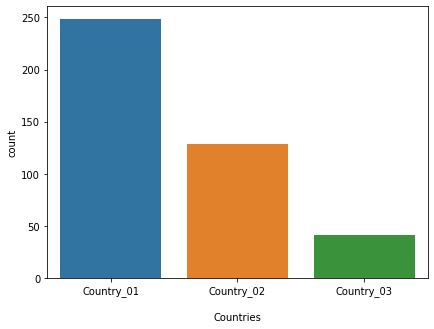

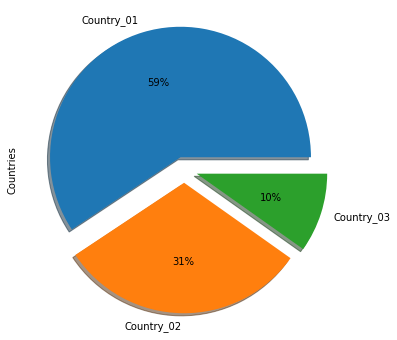

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df['Countries']);
plt.xlabel("\nCountries")

plt.figure(figsize=(6,6))
df['Countries'].value_counts().plot.pie(shadow=True,autopct='%1.f%%', explode=(0.1,0.1,0.1))

**The most affected country from the above dataset is country_01 with around 59% of the accidents with the count of 250**

#### Local

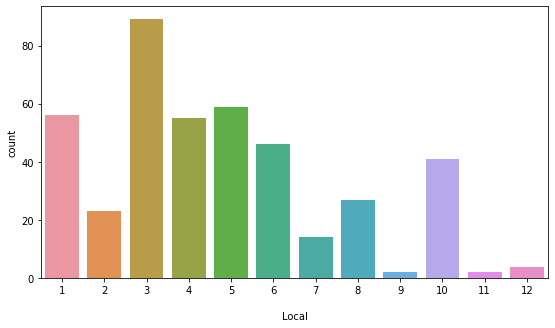

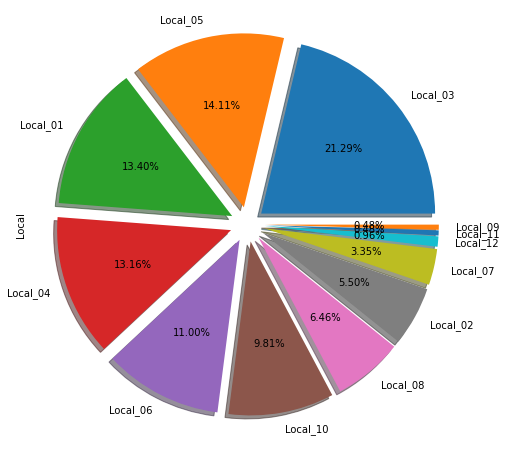

In [35]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Local']);
plt.xlabel("\nLocal")



plt.figure(figsize=(8,8))
df['Local'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%', labels=['Local_03','Local_05','Local_01','Local_04','Local_06','Local_10',
                                                'Local_08','Local_02','Local_07','Local_12','Local_11','Local_09'],  explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1));

**Most accidents happened in Local_03 .Its count is 90 ,which is equivalent to 21.18%.**
**The second Most Accident happens in local_5 which is equivalent to 13.88%.**

#### Industry Sector

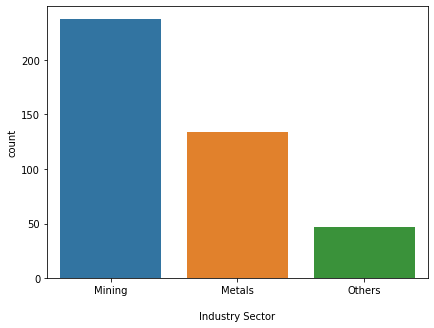

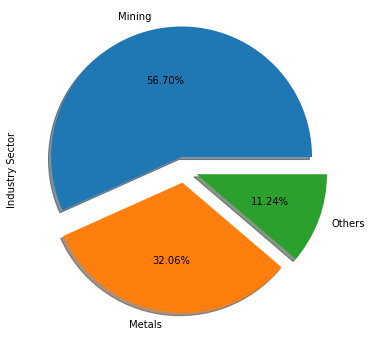

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Industry Sector']);
plt.xlabel("\nIndustry Sector")



plt.figure(figsize=(6,6))
df['Industry Sector'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%',  explode=(0.1,0.1,0.1));

**Mostly affected sector is Mining sector. 56.71% of accidents occur in Mining sector.**



#### Gender

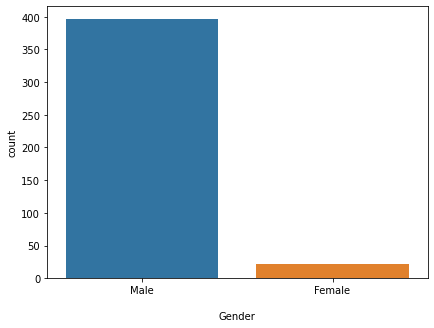

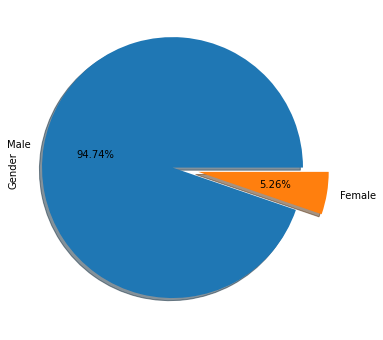

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Gender']);
plt.xlabel("\nGender")



plt.figure(figsize=(6,6))
df['Gender'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%',  explode=(0.1,0.1));

**Most affected workers in accidents are male .Their count is 403 ,which is equivalent to 94.82%**

#### Accident Level

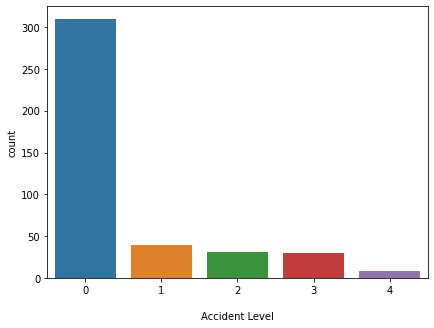

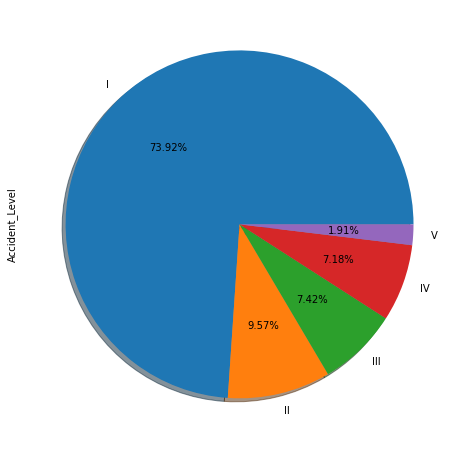

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Accident_Level']);
plt.xlabel("\nAccident Level")



plt.figure(figsize=(8,8))
df['Accident_Level'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%',labels=['I', 'II', 'III' ,'IV' ,'V']);

**Most accidents belongs to "Accident Level - I" .Its count is 316 which is equivalent to 74.35%% of total accidents.**

#### Potential Accident Level

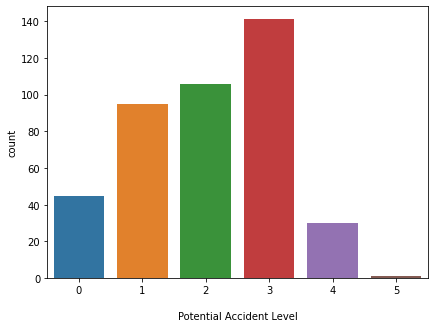

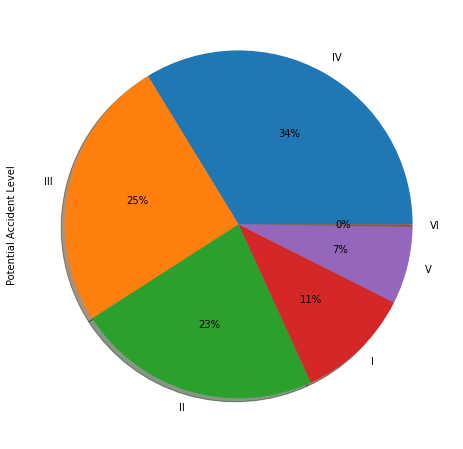

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Potential Accident Level']);
plt.xlabel("\nPotential Accident Level")



plt.figure(figsize=(8,8))
df['Potential Accident Level'].value_counts().plot.pie(shadow=True,autopct='%1.f%%',labels=['IV', 'III', 'II' ,'I' ,'V','VI']);

**Most "Potential Accident Level" belongs to level IV .Its count is 143 which is equivalent to 33.65% of total potential accidents.**

#### Employee or Third Party

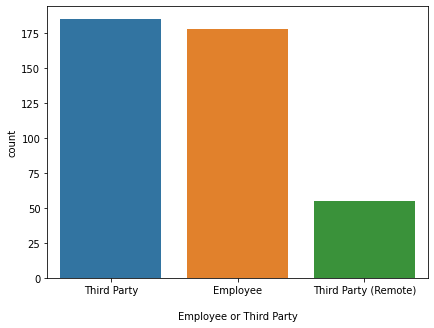

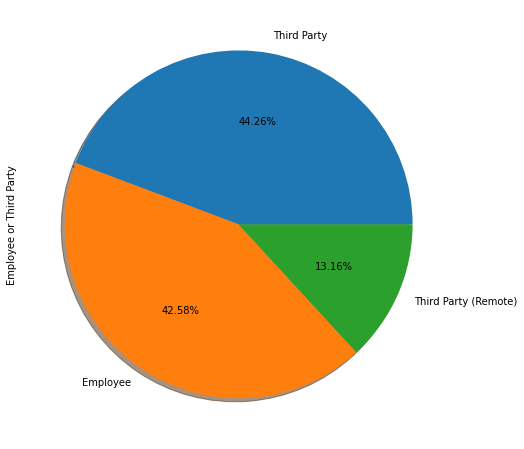

In [40]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Employee or Third Party']);
plt.xlabel("\nEmployee or Third Party")



plt.figure(figsize=(8,8))
df['Employee or Third Party'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%');

**Most affected Employee type are Third party workers .Their count is 189 ,which is equivalent to 44.47%.**

#### Year

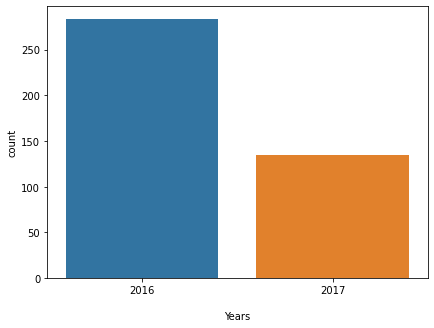

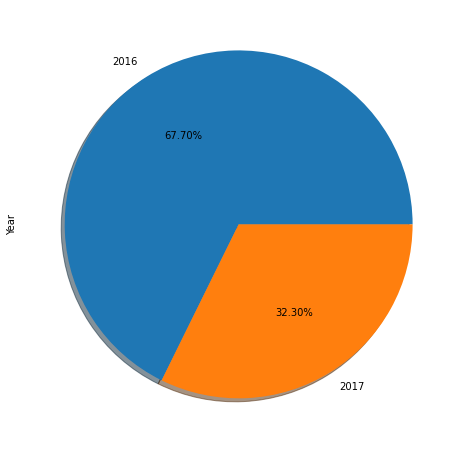

In [41]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Year']);
plt.xlabel("\nYears")



plt.figure(figsize=(8,8))
df['Year'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%');

**Most accidents happend in year 2016.Count is 285 ,which is equivalent to 67.06% .**

#### Month

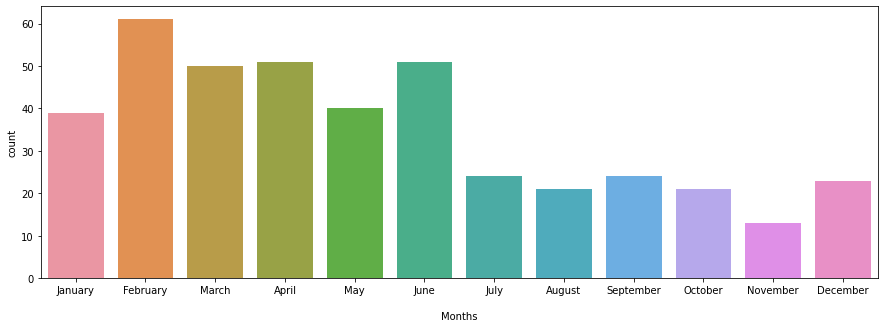

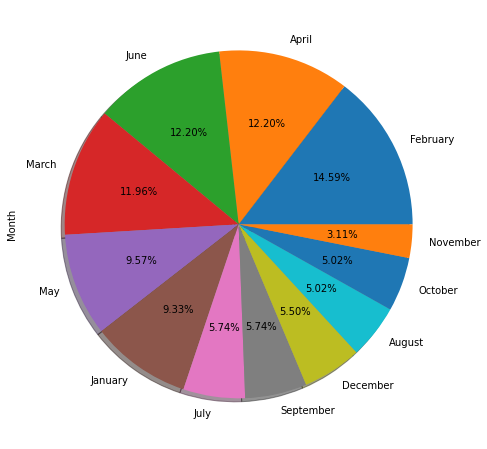

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Month']);
plt.xlabel("\nMonths")



plt.figure(figsize=(8,8))
df['Month'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%');

**Most accidents happend in Feb month.Count is 61 ,which is equivalent to 14.35%**

### Bivariate Analysis

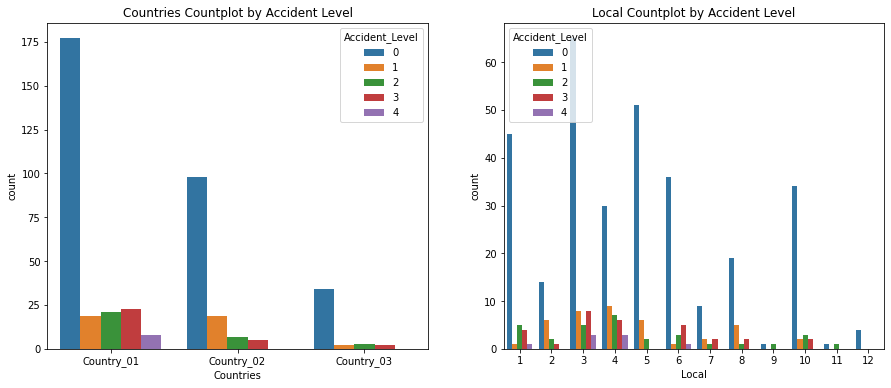

In [43]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Countries Countplot by Accident Level')
sns.countplot(x='Countries',hue='Accident_Level' , data=df );
plt.subplot(1,2,2)
plt.title('Local Countplot by Accident Level')
sns.countplot(x='Local',hue='Accident_Level' , data=df);

plt.show()

#### Country Vs Accident Level
- Accident level I is highest in all countries.                   
- Most accidents happened in Country_01.
- Accident level in Country_03 is lesser than other countries.

#### Local Vs Accident Level
- Accident level I is highest in almost all localities.
- Accident level I is highest in Local 3.
- Local 9,11 and 12 have less accidents level.

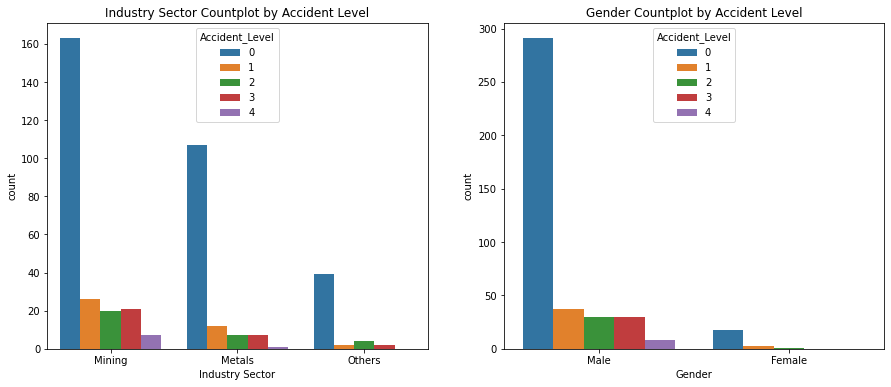

In [44]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Industry Sector Countplot by Accident Level')
sns.countplot(x='Industry Sector',hue='Accident_Level' , data=df );
plt.subplot(1,2,2)
plt.title('Gender Countplot by Accident Level')
sns.countplot(x='Gender',hue='Accident_Level' , data=df);

plt.show()

#### Industry Sector Vs Accident Level
- Accident level I is highest in all industry sector (Mining, Metals and Other).
- Most accidents happened in Mining industry sector.
- After Accident Level I ,Level II is Highest among al the Industries.
- There are very few cases for Accident level 5.

#### Gender Vs Accident Level
- Accident level I is highest among the Gender.
- Most accidents happened with male ones.
- There are very few cases With Females.


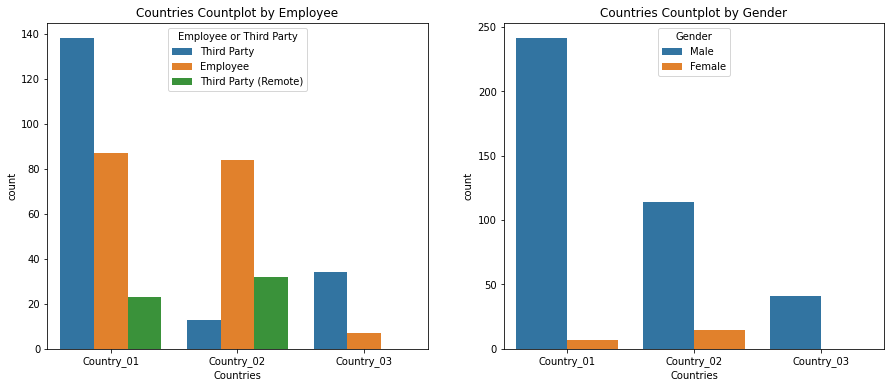

In [45]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Countries Countplot by Employee')
sns.countplot(x="Countries", data=df, hue="Employee or Third Party");
plt.subplot(1,2,2)
plt.title('Countries Countplot by Gender')
sns.countplot(x="Countries", data=df, hue="Gender");

#### Country vs Employee
- Country_01 is highest No. of injuries
- Most accidents happened with Third Party .
- In Country_02 the most effected ones are Employee
- Country_03 has Less injuries as compared to other Countries

#### Country Vs Gender
- Country_01 is highest No. of injuries
- Most accidents happened with Males.
- In all Countries the males are Getting effected more .
- Country_03 has not even single Females 

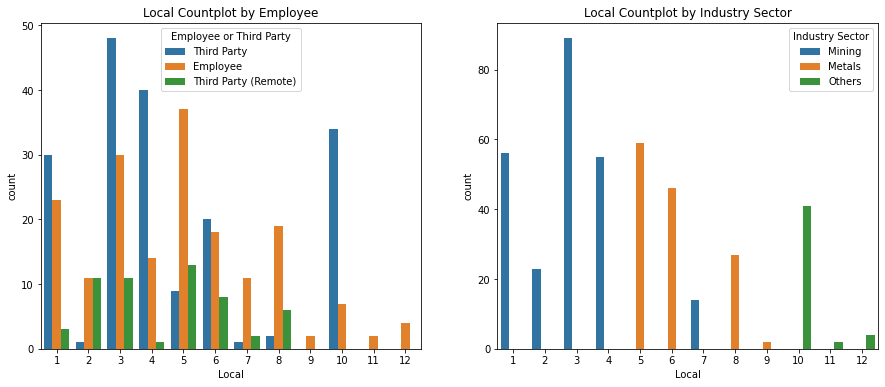

In [46]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Local Countplot by Employee')
sns.countplot(x="Local", data=df, hue="Employee or Third Party");
plt.subplot(1,2,2)
plt.title('Local Countplot by Industry Sector')
sns.countplot(x="Local", data=df, hue="Industry Sector");

#### Local Vs Employees 

- Local 3 has highest no of Third Party employees
- Local 3 has more employees than other localities.
- Local 10,11 don't have Third Party (Remote) employees.
- Local 8,10,11 don't have Employee and Third Party employees.

#### Local Vs Industry Sector 

- Local 3 has highest number of Mining industry sector.
- Local 5 has highest number of Metals industry sector.
- Local 1,2,3,4,7 has Mining industry sector.
- Local 5,6,7,8 has Metals industry sector.
- Local 10,11,12 has Others industry sector.

### Step 3: Data preprocessing

In [47]:
df.head()

Date   Countries  Local Industry Sector  Accident_Level  \
0 2016-01-01  Country_01      1          Mining               0   
1 2016-01-02  Country_02      2          Mining               0   
2 2016-01-06  Country_01      3          Mining               0   
3 2016-01-08  Country_01      4          Mining               0   
4 2016-01-10  Country_01      4          Mining               3   

   Potential Accident Level Gender Employee or Third Party  \
0                         3   Male             Third Party   
1                         3   Male                Employee   
2                         2   Male    Third Party (Remote)   
3                         0   Male             Third Party   
4                         3   Male             Third Party   

         Critical Risk                                        Description  \
0              Pressed  While removing the drill rod of the Jumbo 08 f...   
1  Pressurized Systems  During the activation of a sodium sulphide pum...   
2         Manual Tools  In the sub-station MILPO located at level +170...   
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...   
4               Others  Approximately at 11:45 a.m. in circumstances t...   

   Year    Month  
0  2016  January  
1  2016  January  
2  2016  January  
3  2016  January  
4  2016  January

#### Lower Case

In [48]:
df['Processed_Description'] = df['Description'].str.lower()
df['Processed_Description']

0      while removing the drill rod of the jumbo 08 f...
1      during the activation of a sodium sulphide pum...
2      in the sub-station milpo located at level +170...
3      being 9:45 am. approximately in the nv. 1880 c...
4      approximately at 11:45 a.m. in circumstances t...
                             ...                        
420    being approximately 5:00 a.m. approximately, w...
421    the collaborator moved from the infrastructure...
422    during the environmental monitoring activity i...
423    the employee performed the activity of strippi...
424    at 10:00 a.m., when the assistant cleaned the ...
Name: Processed_Description, Length: 418, dtype: object

 #### Expand Contractions

In [49]:
contractions_dict = {"ain't": "are not","'s":" is","aren't": "are not"}
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)
# Expanding Contractions in the reviews
df['Processed_Description']=df['Processed_Description'].apply(lambda x:expand_contractions(x))

In [50]:
df['Processed_Description']

0      while removing the drill rod of the jumbo 08 f...
1      during the activation of a sodium sulphide pum...
2      in the sub-station milpo located at level +170...
3      being 9:45 am. approximately in the nv. 1880 c...
4      approximately at 11:45 a.m. in circumstances t...
                             ...                        
420    being approximately 5:00 a.m. approximately, w...
421    the collaborator moved from the infrastructure...
422    during the environmental monitoring activity i...
423    the employee performed the activity of strippi...
424    at 10:00 a.m., when the assistant cleaned the ...
Name: Processed_Description, Length: 418, dtype: object

#### Remove punctuations

In [51]:
df['Processed_Description'] = df['Processed_Description'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [52]:
df['Processed_Description']

0      while removing the drill rod of the jumbo 08 f...
1      during the activation of a sodium sulphide pum...
2      in the substation milpo located at level 170 w...
3      being 945 am approximately in the nv 1880 cx69...
4      approximately at 1145 am in circumstances that...
                             ...                        
420    being approximately 500 am approximately when ...
421    the collaborator moved from the infrastructure...
422    during the environmental monitoring activity i...
423    the employee performed the activity of strippi...
424    at 1000 am when the assistant cleaned the floo...
Name: Processed_Description, Length: 418, dtype: object

#### Remove Stopwords

In [53]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('subject')
stop_words.add('http')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['Processed_Description'] = df['Processed_Description'].apply(lambda x: remove_stopwords(x))

In [54]:
df['Processed_Description']

0      removing drill rod jumbo 08 maintenance superv...
1      activation sodium sulphide pump piping uncoupl...
2      substation milpo located level 170 collaborato...
3      945 approximately nv 1880 cx695 ob7 personnel ...
4      approximately 1145 circumstances mechanics ant...
                             ...                        
420    approximately 500 approximately lifting kelly ...
421    collaborator moved infrastructure office julio...
422    environmental monitoring activity area employe...
423    employee performed activity stripping cathodes...
424    1000 assistant cleaned floor module e central ...
Name: Processed_Description, Length: 418, dtype: object

####  Lemmatization

In [55]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [56]:
#lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df['Processed_Description'] = df['Processed_Description'].apply(lambda text: lemmatize_words(text))

In [57]:
df['Processed_Description']

0      removing drill rod jumbo 08 maintenance superv...
1      activation sodium sulphide pump piping uncoupl...
2      substation milpo located level 170 collaborato...
3      945 approximately nv 1880 cx695 ob7 personnel ...
4      approximately 1145 circumstance mechanic antho...
                             ...                        
420    approximately 500 approximately lifting kelly ...
421    collaborator moved infrastructure office julio...
422    environmental monitoring activity area employe...
423    employee performed activity stripping cathode ...
424    1000 assistant cleaned floor module e central ...
Name: Processed_Description, Length: 418, dtype: object

#### Remove Extra Spaces

In [58]:
df['Processed_Description'] = df['Processed_Description'].apply(lambda text: re.sub(' +', ' ', text))

In [59]:
df['Processed_Description']

0      removing drill rod jumbo 08 maintenance superv...
1      activation sodium sulphide pump piping uncoupl...
2      substation milpo located level 170 collaborato...
3      945 approximately nv 1880 cx695 ob7 personnel ...
4      approximately 1145 circumstance mechanic antho...
                             ...                        
420    approximately 500 approximately lifting kelly ...
421    collaborator moved infrastructure office julio...
422    environmental monitoring activity area employe...
423    employee performed activity stripping cathode ...
424    1000 assistant cleaned floor module e central ...
Name: Processed_Description, Length: 418, dtype: object

#### Tokenization and keeping alphabets

In [60]:
#defining function for tokenization
stop=set(stopwords.words('english'))
import re
def tokenization(text):
    c=[]
    for desc in text:
        words=[w for w in word_tokenize(desc) if (w not in stop)]
        words = [word for word in words if word.isalpha()]
        c.append(words)
    return c 

In [61]:
df['Processed_Description']= tokenization(df['Processed_Description'])

In [62]:
df['Processed_Description']

0      [removing, drill, rod, jumbo, maintenance, sup...
1      [activation, sodium, sulphide, pump, piping, u...
2      [substation, milpo, located, level, collaborat...
3      [approximately, nv, personnel, begin, task, un...
4      [approximately, circumstance, mechanic, anthon...
                             ...                        
420    [approximately, approximately, lifting, kelly,...
421    [collaborator, moved, infrastructure, office, ...
422    [environmental, monitoring, activity, area, em...
423    [employee, performed, activity, stripping, cat...
424    [assistant, cleaned, floor, module, e, central...
Name: Processed_Description, Length: 418, dtype: object

#### Maximum length of the sentence

In [63]:
leng = []
for i in df['Processed_Description']:
    leng.append(len(i))
print('Maximum length of the sentence in processed description :',max(leng))

Maximum length of the sentence in processed description : 93


#### Processing the description

In [64]:
desc_processed = []
desc_processed = [' '.join(i) for i in df.Processed_Description]

In [65]:
df['Processed_Description_Final'] = desc_processed

In [66]:
df.head()

Date   Countries  Local Industry Sector  Accident_Level  \
0 2016-01-01  Country_01      1          Mining               0   
1 2016-01-02  Country_02      2          Mining               0   
2 2016-01-06  Country_01      3          Mining               0   
3 2016-01-08  Country_01      4          Mining               0   
4 2016-01-10  Country_01      4          Mining               3   

   Potential Accident Level Gender Employee or Third Party  \
0                         3   Male             Third Party   
1                         3   Male                Employee   
2                         2   Male    Third Party (Remote)   
3                         0   Male             Third Party   
4                         3   Male             Third Party   

         Critical Risk                                        Description  \
0              Pressed  While removing the drill rod of the Jumbo 08 f...   
1  Pressurized Systems  During the activation of a sodium sulphide pum...   
2         Manual Tools  In the sub-station MILPO located at level +170...   
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...   
4               Others  Approximately at 11:45 a.m. in circumstances t...   

   Year    Month                              Processed_Description  \
0  2016  January  [removing, drill, rod, jumbo, maintenance, sup...   
1  2016  January  [activation, sodium, sulphide, pump, piping, u...   
2  2016  January  [substation, milpo, located, level, collaborat...   
3  2016  January  [approximately, nv, personnel, begin, task, un...   
4  2016  January  [approximately, circumstance, mechanic, anthon...   

                         Processed_Description_Final  
0  removing drill rod jumbo maintenance superviso...  
1  activation sodium sulphide pump piping uncoupl...  
2  substation milpo located level collaborator ex...  
3  approximately nv personnel begin task unlockin...  
4  approximately circumstance mechanic anthony gr...

#### Word Cloud

In [67]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

(-0.5, 399.5, 199.5, -0.5)

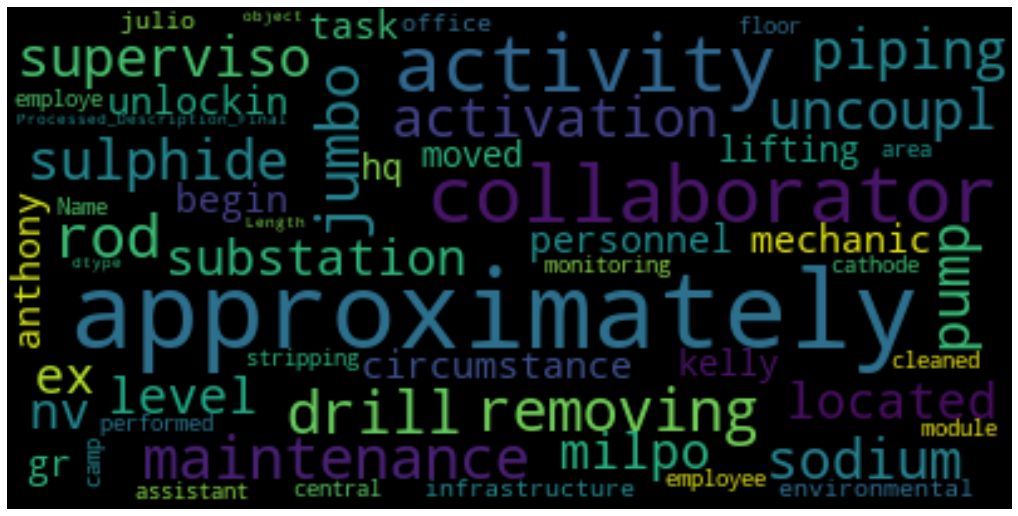

In [68]:
stopwords = set(STOPWORDS)

# Generate a word cloud image
desc = df['Processed_Description_Final']
wordcloud = WordCloud(stopwords = stopwords, background_color = "black").generate(str(desc))

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = [18, 18])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [69]:
df_AccidentLevel_1 = df[df['Accident_Level'] == 0]

In [70]:
df_AccidentLevel_2 = df[df['Accident_Level'] == 1]

In [71]:
df_AccidentLevel_3 = df[df['Accident_Level'] == 2]

In [72]:
df_AccidentLevel_4 = df[df['Accident_Level'] == 3]

In [73]:
df_AccidentLevel_5 = df[df['Accident_Level'] == 4]

In [74]:
df_AccidentLevel_1['Processed_Description_Final']

0      removing drill rod jumbo maintenance superviso...
1      activation sodium sulphide pump piping uncoupl...
2      substation milpo located level collaborator ex...
3      approximately nv personnel begin task unlockin...
5      unloading operation ustulado bag need unclog d...
                             ...                        
420    approximately approximately lifting kelly hq t...
421    collaborator moved infrastructure office julio...
422    environmental monitoring activity area employe...
423    employee performed activity stripping cathode ...
424    assistant cleaned floor module e central camp ...
Name: Processed_Description_Final, Length: 309, dtype: object

In [75]:
df_AccidentLevel_2['Processed_Description_Final']

22     aligning right bracket tower n releasing tensi...
23     loosening truck steering cylinder bolt using p...
29     using griff wrench unscrew rod probe key came ...
40     maintenance flyght pump rotor oil pressure lub...
55     discharge waste operator proceeds remove bag h...
60     employee performing adjustment tightening oper...
69     approximately pm level cx bp circumstance work...
78     accessing santa novo area order open chop gene...
99     employee report placed air lance tank opened m...
109    pm approximately nv mr kevin helper jumbo remo...
127    test soft starter engine belt collaborator igo...
136    field trip lt lajes target junior da costa off...
179    time mill operator proceeded remove vitaulic f...
183    employee partner company gr report cutting wat...
185    time worker cleaning long hole production mesh...
201    execution area cleaning activity using hoe emp...
203    clerk cutting excess fiberglass passing box co...
216    employee report monitori

In [76]:
df_AccidentLevel_3['Processed_Description_Final']

16     rp level circumstance worker company performin...
32     worker yaranga working barretilla stop level u...
49     time worker another partner preparing move oil...
51     circumstance two worker company incimmet made ...
54     manually moving steel cabinet disposal help an...
74     plant stop scheduled maintenance almost end ch...
82     open suction valve acid pump cable pump come l...
102    mr jesus operator concrete throwing team alpha...
163    mr frank support another mechanic preparing pl...
168    h approx hour operator fernando opening wagon ...
169    execution drilling target bolt made company se...
171    accident occurred time employee partner compan...
189    ore transport work bine filled tenth mining ca...
190    circumstance drilling assistant proceeded asse...
206    maintenance work vertical pump zinc concentrat...
212    city conchucos ancash participating patronal f...
232    probe bore around hour polling assistant lucia...
235    approx hr mr eliseo seco

In [77]:
df_AccidentLevel_4['Processed_Description_Final']

4      approximately circumstance mechanic anthony gr...
13     moment operator jumbo tried energize equipment...
61     approximately circumstance messrs truck crane ...
67     refurbishment work hdpe pipe diameter two work...
79     performing sleeve removal maneuver hole meter ...
105    ddh chamber company explomin located level soc...
125    field trip return work lunch employee wellfiel...
142    approximately pm operator eustaquio fall metal...
154    approximately pm operator paulo operator filte...
155    operator scissor leaf equipment parked level a...
166    moment maperu truck plate returned city pasco ...
170    operator paste filling plant remove floor grat...
187    withdrawal fixed jaw wedge crusher hoisting de...
207    section row cell worker performs anode lifting...
239    circumstance assistant mine arranging advance ...
247    activity placing board rack exchange fabric fi...
248    observing pulp overflow overflow reception dra...
251    approximately mr wilmer 

In [78]:
df_AccidentLevel_5['Processed_Description_Final']

33     approximately pm circumstance shotcrete launch...
135    pm approximately nv tecnomin winery mr chagua ...
162    access level installation activity hydraulic f...
307    process loading drill carmen pit level operato...
351    scoop heading rpa cutoff point cro south unloa...
357    activity changing conveyor belt feeding primar...
358    approximately hour change cable power cell loc...
389    performing shotcrete casting resane cruise nv ...
Name: Processed_Description_Final, dtype: object

#### Word Cloud for Accident Level 1

(-0.5, 399.5, 199.5, -0.5)

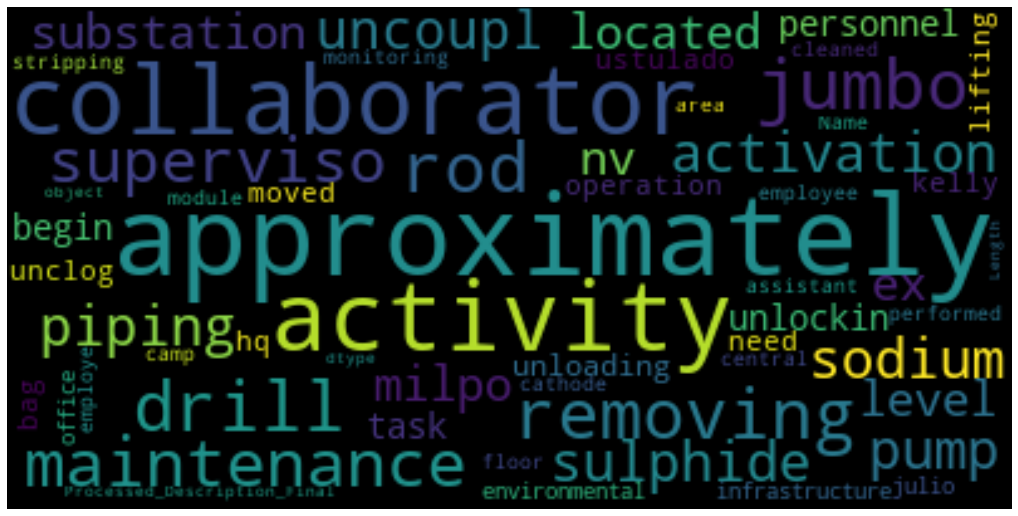

In [79]:
stopwords = set(STOPWORDS)

# Generate a word cloud image
desc = df_AccidentLevel_1['Processed_Description_Final']
wordcloud = WordCloud(stopwords = stopwords, background_color = "black").generate(str(desc))

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = [18, 18])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

### Word Cloud for Accident Level 2

(-0.5, 399.5, 199.5, -0.5)

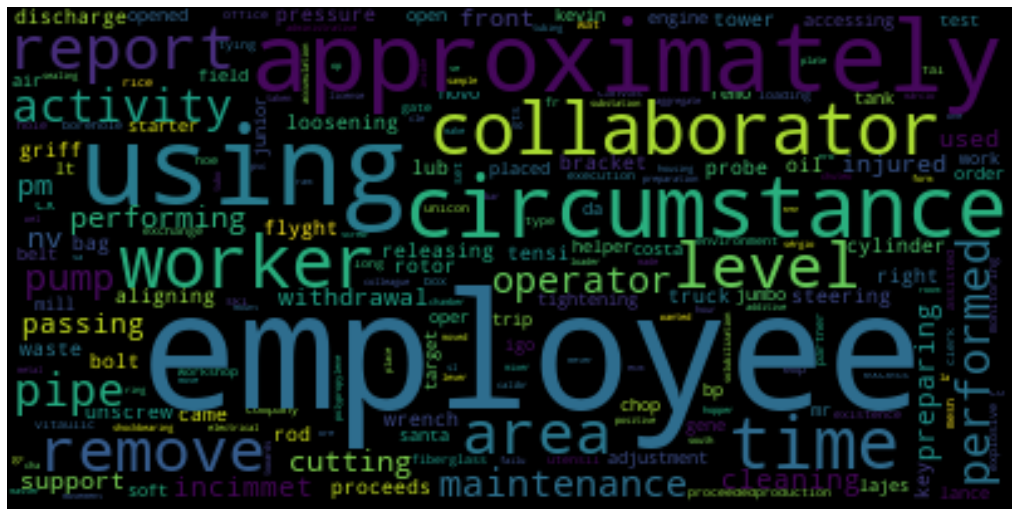

In [80]:
stopwords = set(STOPWORDS)

# Generate a word cloud image
desc = df_AccidentLevel_2['Processed_Description_Final']
wordcloud = WordCloud(stopwords = stopwords, background_color = "black").generate(str(desc))

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = [18, 18])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

### Word Cloud for Accident Level 3

(-0.5, 399.5, 199.5, -0.5)

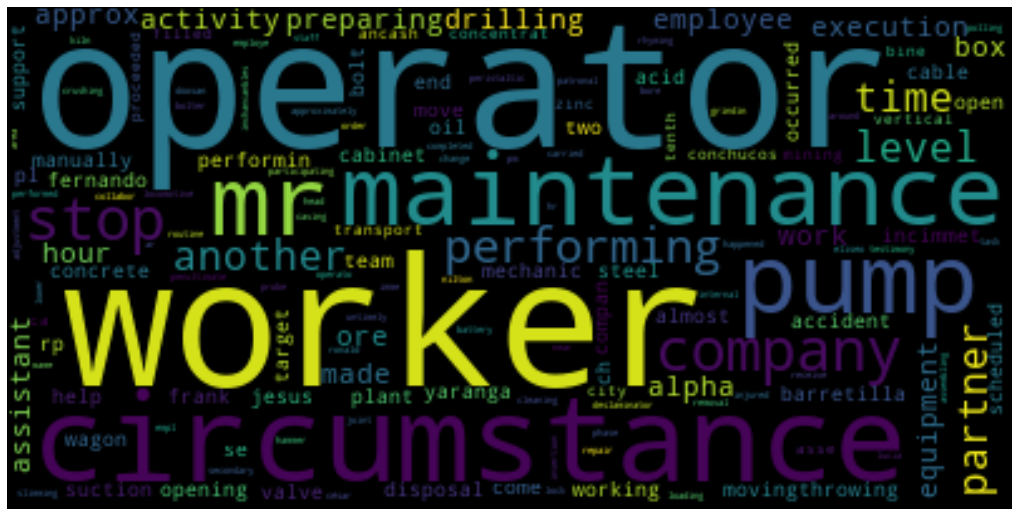

In [81]:
stopwords = set(STOPWORDS)

# Generate a word cloud image
desc = df_AccidentLevel_3['Processed_Description_Final']
wordcloud = WordCloud(stopwords = stopwords, background_color = "black").generate(str(desc))

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = [18, 18])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

### Word Cloud for Accident Level 4

(-0.5, 399.5, 199.5, -0.5)

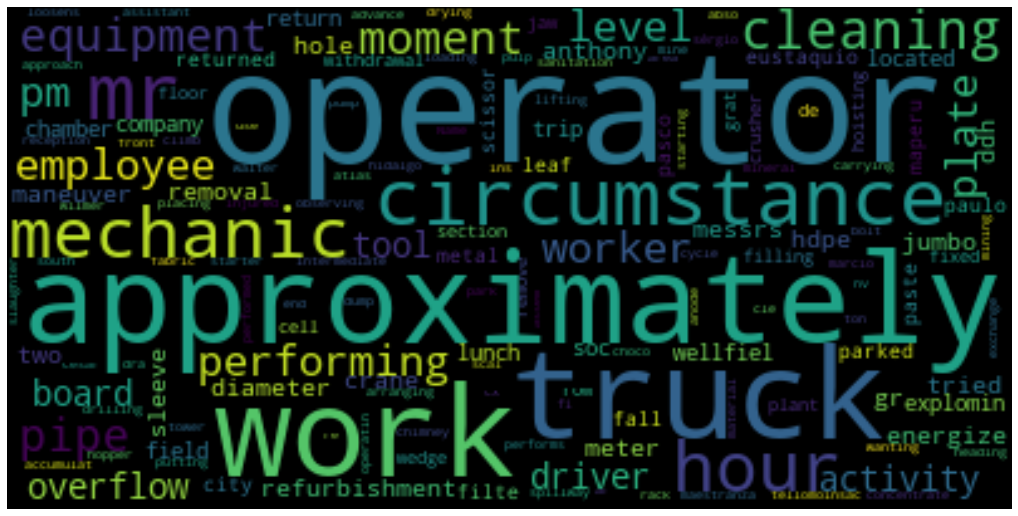

In [82]:
stopwords = set(STOPWORDS)

# Generate a word cloud image
desc = df_AccidentLevel_4['Processed_Description_Final']
wordcloud = WordCloud(stopwords = stopwords, background_color = "black").generate(str(desc))

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = [18, 18])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

### Word Cloud for Accident Level 5

(-0.5, 399.5, 199.5, -0.5)

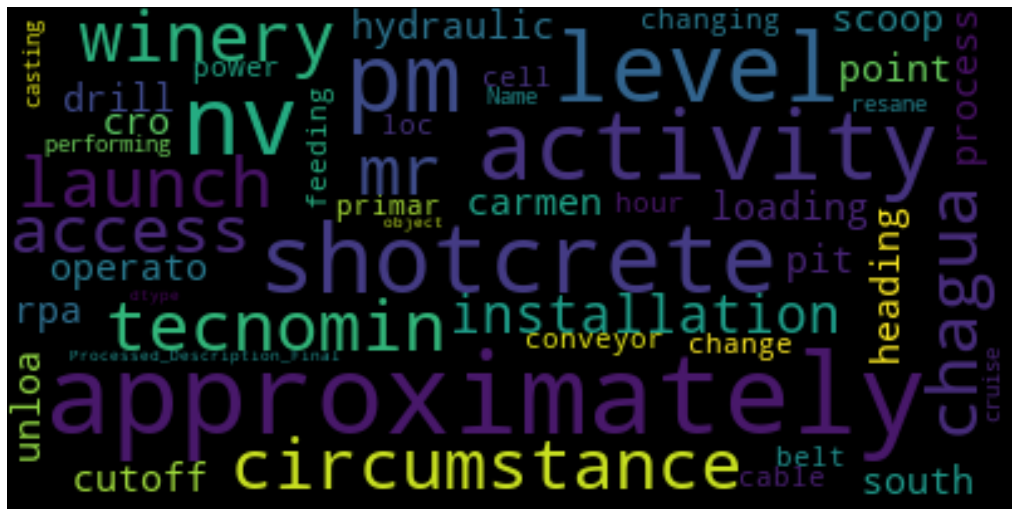

In [83]:
stopwords = set(STOPWORDS)

# Generate a word cloud image
desc = df_AccidentLevel_5['Processed_Description_Final']
wordcloud = WordCloud(stopwords = stopwords, background_color = "black").generate(str(desc))

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = [18, 18])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

### Step 4: Data preparation to be used for AIML model learning

In [84]:
df
df.head()

Date   Countries  Local Industry Sector  Accident_Level  \
0 2016-01-01  Country_01      1          Mining               0   
1 2016-01-02  Country_02      2          Mining               0   
2 2016-01-06  Country_01      3          Mining               0   
3 2016-01-08  Country_01      4          Mining               0   
4 2016-01-10  Country_01      4          Mining               3   

   Potential Accident Level Gender Employee or Third Party  \
0                         3   Male             Third Party   
1                         3   Male                Employee   
2                         2   Male    Third Party (Remote)   
3                         0   Male             Third Party   
4                         3   Male             Third Party   

         Critical Risk                                        Description  \
0              Pressed  While removing the drill rod of the Jumbo 08 f...   
1  Pressurized Systems  During the activation of a sodium sulphide pum...   
2         Manual Tools  In the sub-station MILPO located at level +170...   
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...   
4               Others  Approximately at 11:45 a.m. in circumstances t...   

   Year    Month                              Processed_Description  \
0  2016  January  [removing, drill, rod, jumbo, maintenance, sup...   
1  2016  January  [activation, sodium, sulphide, pump, piping, u...   
2  2016  January  [substation, milpo, located, level, collaborat...   
3  2016  January  [approximately, nv, personnel, begin, task, un...   
4  2016  January  [approximately, circumstance, mechanic, anthon...   

                         Processed_Description_Final  
0  removing drill rod jumbo maintenance superviso...  
1  activation sodium sulphide pump piping uncoupl...  
2  substation milpo located level collaborator ex...  
3  approximately nv personnel begin task unlockin...  
4  approximately circumstance mechanic anthony gr...

In [85]:
df.drop(columns=['Processed_Description'],axis=1,inplace=True)

In [86]:
df

Date   Countries  Local Industry Sector  Accident_Level  \
0   2016-01-01  Country_01      1          Mining               0   
1   2016-01-02  Country_02      2          Mining               0   
2   2016-01-06  Country_01      3          Mining               0   
3   2016-01-08  Country_01      4          Mining               0   
4   2016-01-10  Country_01      4          Mining               3   
..         ...         ...    ...             ...             ...   
420 2017-07-04  Country_01      4          Mining               0   
421 2017-07-04  Country_01      3          Mining               0   
422 2017-07-05  Country_02      9          Metals               0   
423 2017-07-06  Country_02      5          Metals               0   
424 2017-07-09  Country_01      4          Mining               0   

     Potential Accident Level  Gender Employee or Third Party  \
0                           3    Male             Third Party   
1                           3    Male                Employee   
2                           2    Male    Third Party (Remote)   
3                           0    Male             Third Party   
4                           3    Male             Third Party   
..                        ...     ...                     ...   
420                         2    Male             Third Party   
421                         1  Female                Employee   
422                         1    Male                Employee   
423                         1    Male                Employee   
424                         1  Female             Third Party   

                    Critical Risk  \
0                         Pressed   
1             Pressurized Systems   
2                    Manual Tools   
3                          Others   
4                          Others   
..                            ...   
420                        Others   
421                        Others   
422              Venomous Animals   
423                           Cut   
424  Fall prevention (same level)   

                                           Description  Year    Month  \
0    While removing the drill rod of the Jumbo 08 f...  2016  January   
1    During the activation of a sodium sulphide pum...  2016  January   
2    In the sub-station MILPO located at level +170...  2016  January   
3    Being 9:45 am. approximately in the Nv. 1880 C...  2016  January   
4    Approximately at 11:45 a.m. in circumstances t...  2016  January   
..                                                 ...   ...      ...   
420  Being approximately 5:00 a.m. approximately, w...  2017     July   
421  The collaborator moved from the infrastructure...  2017     July   
422  During the environmental monitoring activity i...  2017     July   
423  The Employee performed the activity of strippi...  2017     July   
424  At 10:00 a.m., when the assistant cleaned the ...  2017     July   

                           Processed_Description_Final  
0    removing drill rod jumbo maintenance superviso...  
1    activation sodium sulphide pump piping uncoupl...  
2    substation milpo located level collaborator ex...  
3    approximately nv personnel begin task unlockin...  
4    approximately circumstance mechanic anthony gr...  
..                                                 ...  
420  approximately approximately lifting kelly hq t...  
421  collaborator moved infrastructure office julio...  
422  environmental monitoring activity area employe...  
423  employee performed activity stripping cathode ...  
424  assistant cleaned floor module e central camp ...  

[418 rows x 13 columns]

#### Export Clean Data to CSV

In [87]:
#df.to_csv('/content/drive/MyDrive/archive (1)/IHMStefanini_industrial_safety_and_health_database_with_accidents_description_Cleaned.csv')

In [88]:
df.to_csv('IHMStefanini_industrial_safety_and_health_database_with_accidents_description_Cleaned.csv')

#### Getting Target variable

In [89]:
X= df['Processed_Description_Final']

In [90]:
y = df['Accident_Level']

#### Split data into train and test.

In [91]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,test_size = 0.2)

In [92]:
print(X_train.shape)
print(y_train.shape)

(334,)
(334,)


In [93]:
print(X_test.shape)
print(y_test.shape)

(84,)
(84,)


In [94]:
X_test

324    performing carpentry work collaborator hit sec...
327    maintenance peristaltic pump change internal h...
394    hour end concentrate truck cleaning driver ins...
56     circumstance operator going level level notice...
154    approximately pm operator paulo operator filte...
                             ...                        
57     installing ripper pin tractor ripper support a...
127    test soft starter engine belt collaborator igo...
24     operator deslaminadora section unlocking sheet...
17     due overheating bar row cell spark produced pr...
66     carrying activity cutting electrowelded mesh w...
Name: Processed_Description_Final, Length: 84, dtype: object

In [95]:
y_test

324    0
327    2
394    3
56     0
154    3
      ..
57     0
127    1
24     0
17     0
66     0
Name: Accident_Level, Length: 84, dtype: int64

## Milestone 2:

### Input: Output of milestone 1


### Process:



### Step 1: Feature Engineering

#### Bag Of Words.

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True, ngram_range=(1, 1), max_features=50)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [97]:
vectorizer.get_feature_names()[:5]

['accident', 'activity', 'approximately', 'area', 'assistant']

#### View term-document matrix

In [98]:
X_train_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [99]:
X_train_bow.shape

(334, 50)

In [100]:
X_test_bow.shape

(84, 50)

#### TF-IDF

In [101]:
# Initializing TfidfVectorizer object
tfIdfVectorizer = TfidfVectorizer(max_features=50)
X_train_tf = tfIdfVectorizer.fit_transform(X_train)
X_test_tf = tfIdfVectorizer.transform(X_test)

In [102]:
tfIdfVectorizer.get_feature_names()[:5]

['accident', 'activity', 'approximately', 'area', 'assistant']

In [103]:
X_train_tf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.21073146, 0.        , 0.        , ..., 0.        , 0.2148431 ,
        0.22540115],
       [0.71977351, 0.        , 0.        , ..., 0.        , 0.        ,
        0.38493962],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.3459178 ,
        0.36291727],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [104]:
X_train_tf.shape

(334, 50)

In [105]:
X_test_tf.shape

(84, 50)

#### Word2Vec




In [106]:
pip install -U gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.3 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [107]:
import gensim
from gensim.models import Word2Vec

In [108]:
# Converting the words back to the sentence form for modelling
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += wv_model.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [109]:
training = X.tolist() # Covnerting the text to list
training = [sentence.split(' ')  for sentence in training] # Splitting on each sentence which gives the multi dimensional list 
np.array(training[0]) # Priting the first sentence

array(['removing', 'drill', 'rod', 'jumbo', 'maintenance', 'supervisor',
       'proceeds', 'loosen', 'support', 'intermediate', 'centralizer',
       'facilitate', 'removal', 'seeing', 'mechanic', 'support', 'one',
       'end', 'drill', 'equipment', 'pull', 'hand', 'bar', 'accelerate',
       'removal', 'moment', 'bar', 'slide', 'point', 'support',
       'tightens', 'finger', 'mechanic', 'drilling', 'bar', 'beam',
       'jumbo'], dtype='<U12')

In [110]:
# Initiation of Word2Vec model
# Every word represented by 100 dimensions, ignore words which appears less than 2 times, and use cbow model

wv_model = Word2Vec(sentences=training,
                 min_count =2,
                 sg=0, 
                 vector_size=100)
print(wv_model)

Word2Vec<vocab=1485, vector_size=100, alpha=0.025>


In [111]:
vectors = wv_model.wv.vectors # Storing the vectors of words which is trained on word2vec model

In [112]:
vectors.shape

(1485, 100)

In [113]:
tokenized_words = [i.split() for i in X]
wordvec_arrays = np.zeros((len(tokenized_words), 100))

for i in range(len(tokenized_words)):
    wordvec_arrays[i,:] = word_vector(tokenized_words[i], 100)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(418, 100)

In [114]:
# Splitting the data on word2vec embeddings
xtrain_w2v, xtest_w2v,ytrain_w2v,ytest_w2v= train_test_split(wordvec_df,y.values, random_state=42, test_size=0.2)

In [115]:
xtrain_w2v.shape

(334, 100)

In [116]:
ytrain_w2v.shape

(334,)

In [117]:
xtest_w2v.shape

(84, 100)

#### Skipgram

In [118]:
# Converting the words back to the sentence form for modelling
def word_vector_sg(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += wv_model_sg.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [119]:
wv_model_sg = Word2Vec(sentences=training,
                 min_count =2,
                 sg=1, 
                 vector_size=100)
print(wv_model_sg)

Word2Vec<vocab=1485, vector_size=100, alpha=0.025>


In [120]:
tokenized_words = [i.split() for i in X]
wordvec_arrays = np.zeros((len(tokenized_words), 100))

for i in range(len(tokenized_words)):
    wordvec_arrays[i,:] = word_vector_sg(tokenized_words[i], 100)
    
wordvec_sg = pd.DataFrame(wordvec_arrays)
wordvec_sg.shape

(418, 100)

In [121]:
# Splitting the data on word2vec embeddings
xtrain_w2v_sg, xtest_w2v_sg,ytrain_w2v_sg,ytest_w2v_sg= train_test_split(wordvec_sg,y.values, random_state=42, test_size=0.2)

In [122]:
xtrain_w2v_sg.shape

(334, 100)

In [123]:
xtest_w2v_sg.shape

(84, 100)

#### Glove

In [124]:
from tqdm import tqdm

In [125]:
#Using glove embedding from 200d file, which is imported locally into kaggle.
embeddings_index = {}
EMBEDDING_FILE = '/content/drive/MyDrive/glove.6B.200d.txt'
#EMBEDDING_FILE = 'glove.6B.200d.txt'

f = open(EMBEDDING_FILE, encoding="utf8")
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [00:17, 22426.25it/s]

Found 400000 word vectors.


In [126]:
# this function creates a normalized vector for the whole sentence
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [127]:
# create sentence GLOVE embeddings vectors using the above function for training and validation set
ind_glove_df = [sent2vec(x) for x in tqdm(X)]

100%|██████████| 418/418 [00:00<00:00, 3857.73it/s]


In [128]:
wordvec_gl = pd.DataFrame(ind_glove_df)

In [129]:
wordvec_gl.shape

(418, 200)

In [130]:
# Splitting the data on word2vec embeddings
xtrain_gl, xtest_gl,ytrain_gl,ytest_gl= train_test_split(wordvec_gl,y.values, random_state=42, test_size=0.2)

In [131]:
xtrain_gl.shape

(334, 200)

In [132]:
xtest_gl.shape

(84, 200)

#### Fasttext

In [133]:
from gensim.models import FastText
model_ft = FastText(training, window=5, min_count=5, workers=4,sg=1)

In [134]:
# Converting the words back to the sentence form for modelling
def word_vector_ft(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_ft.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [135]:
tokenized_words = [i.split() for i in X]
wordvec_arrays = np.zeros((len(tokenized_words), 100))

for i in range(len(tokenized_words)):
    wordvec_arrays[i,:] = word_vector_ft(tokenized_words[i], 100)
    
wordvec_ft = pd.DataFrame(wordvec_arrays)
wordvec_ft.shape

(418, 100)

In [136]:
wordvec_ft.head(5)

0         1         2         3         4         5         6   \
0 -0.198897  0.084325 -0.117370  0.083529  0.022178  0.023789 -0.034805   
1 -0.166819  0.070366 -0.098772  0.069355  0.018875  0.020998 -0.028022   
2 -0.186068  0.079735 -0.109338  0.077461  0.020716  0.024749 -0.032420   
3 -0.180646  0.077179 -0.107250  0.076104  0.020548  0.023127 -0.032061   
4 -0.181122  0.076870 -0.107007  0.077623  0.021219  0.022889 -0.031649   

         7         8         9   ...        90        91        92        93  \
0  0.032488  0.051124 -0.251980  ... -0.311136 -0.154860 -0.134065 -0.058190   
1  0.026540  0.042580 -0.208552  ... -0.258158 -0.128867 -0.112045 -0.049143   
2  0.029786  0.047583 -0.233443  ... -0.290026 -0.143082 -0.125860 -0.053070   
3  0.029256  0.046913 -0.228389  ... -0.282383 -0.140961 -0.122601 -0.053063   
4  0.029081  0.045405 -0.231040  ... -0.284761 -0.140048 -0.123348 -0.054464   

         94        95        96        97        98        99  
0 -0.305914  0.051992  0.105924 -0.159060  0.031706  0.208454  
1 -0.254600  0.044405  0.087791 -0.132344  0.026383  0.175997  
2 -0.283773  0.049784  0.097354 -0.147581  0.031028  0.195989  
3 -0.278044  0.048207  0.095844 -0.144747  0.029244  0.190552  
4 -0.279061  0.047923  0.097213 -0.145332  0.029199  0.190754  

[5 rows x 100 columns]

In [137]:
# Splitting the data on fasttext embeddings
xtrain_ft, xtest_ft,ytrain_ft,ytest_ft= train_test_split(wordvec_ft,y.values, random_state=42, test_size=0.2)

In [138]:
xtrain_ft.shape

(334, 100)

In [139]:
xtest_ft.shape

(84, 100)

#### Doc2vec

In [140]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [141]:
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(X)]

In [142]:
len(tagged_data)

418

In [143]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model
                                  dm_mean=1, # dm_mean = 1 for using mean of the context word vectors
                                  vector_size=100, # no. of desired features
                                  window=5, # width of the context window                                  
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 5.                                  
                                  workers=32, # no. of cores                                  
                                  alpha=0.1, # learning rate                                  
                                  seed = 23, # for reproducibility
                                 ) 

model_d2v.build_vocab([i for i in tqdm(tagged_data)])

model_d2v.train(tagged_data,total_examples=len(tagged_data),epochs=15)

100%|██████████| 418/418 [00:00<00:00, 373025.33it/s]


In [144]:
docvec_arrays = np.zeros((len(tagged_data), 100)) 
for i in range(len(tagged_data)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,100))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(418, 100)

In [145]:
# Splitting the data on doc2vec embeddings
xtrain_dc, xtest_dc,ytrain_dc,ytest_dc= train_test_split(docvec_df,y.values, random_state=42, test_size=0.2)

In [146]:
xtrain_dc.shape

(334, 100)

In [147]:
xtest_dc.shape

(84, 100)

### Step 2: Design, train and test machine learning classifiers

#### Build classifier Models.

#### Using BOW Vectorizer

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

def build_model_train(X_train, y_train, X_test, y_test):
    models = {
        'LogReg':LogisticRegression(C=1.0, penalty='l1', dual=False, solver='liblinear'), 
        'SVM': SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', decision_function_shape='ovr', random_state=None), 
        'Naive Bayes': GaussianNB(priors=None, var_smoothing=1e-09),
        'KNN': KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None),
        'Random Forest':RandomForestClassifier(n_estimators=100, max_depth=30),
        'Bagging': BaggingClassifier(n_estimators=50, max_samples=.7),
        'AdaBoost': AdaBoostClassifier(n_estimators= 50),
        'Gradient Boost': GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05),
        'XGBoost': XGBClassifier()
      }
    modelnames = []
    accuracyscorestrain = []
    accuracyscorestest = []
    f1scorestrain = []
    f1scorestest = []
    recallscorestrain = []
    recallscorestest = []
    precisionscorestrain = []
    precisionscorestest = []
    classificationreport = []
    confusionmatrix = []
    for modelname, model in models.items():
        clf = model.fit(X_train, y_train) 
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        modelnames.append(modelname)
        accuracyscorestrain.append(accuracy_score(y_train, y_pred_train))
        accuracyscorestest.append(accuracy_score(y_test, y_pred_test))
        f1scorestrain.append(f1_score(y_train, y_pred_train, average='weighted'))
        f1scorestest.append(f1_score(y_test, y_pred_test, average='weighted'))
        recallscorestrain.append(recall_score(y_train, y_pred_train, average='weighted'))
        recallscorestest.append(recall_score(y_test, y_pred_test, average='weighted'))
        precisionscorestrain.append(precision_score(y_train, y_pred_train, average='weighted'))
        precisionscorestest.append(precision_score(y_test, y_pred_test, average='weighted'))
        result_df =  pd.DataFrame({'Model': modelnames, 'Accuracy score Train': accuracyscorestrain, 'Accuracy score Test': accuracyscorestest,
                               
                               'Train F1 Score': f1scorestrain,
                               'Test F1 Score': f1scorestest,
                               'Train Recall': recallscorestrain,
                               'Test Recall': recallscorestest,
                               'Train Precision': precisionscorestrain,
                               'Test Precision': precisionscorestest                               
                          })
  
    
    return result_df

In [149]:
build_model_train(X_train_bow.toarray(),y_train,X_test_bow.toarray(),y_test)

Model  Accuracy score Train  Accuracy score Test  Train F1 Score  \
0          LogReg              0.757485             0.714286        0.682639   
1             SVM              0.766467             0.750000        0.688916   
2     Naive Bayes              0.215569             0.142857        0.231647   
3             KNN              0.736527             0.726190        0.635152   
4   Random Forest              0.994012             0.714286        0.993950   
5         Bagging              0.961078             0.702381        0.957613   
6        AdaBoost              0.577844             0.595238        0.577502   
7  Gradient Boost              0.859281             0.678571        0.839650   
8         XGBoost              0.868263             0.726190        0.852249   

   Test F1 Score  Train Recall  Test Recall  Train Precision  Test Precision  
0       0.629371      0.757485     0.714286         0.756959        0.562500  
1       0.642857      0.766467     0.750000         0.804724        0.562500  
2       0.182104      0.215569     0.142857         0.760006        0.612566  
3       0.631034      0.736527     0.726190         0.625422        0.557927  
4       0.625000      0.994012     0.714286         0.994149        0.555556  
5       0.623239      0.961078     0.702381         0.962749        0.560127  
6       0.594234      0.577844     0.595238         0.584227        0.669389  
7       0.606383      0.859281     0.678571         0.876730        0.548077  
8       0.631034      0.868263     0.726190         0.883645        0.557927

**KNN performs best that all other models because it is not overfitting and the Test accuracy increases. Rest of the models are overfitting. SVM also does good but as good as KNN**

#### Using TF-IDF Vectorizer

In [150]:
build_model_train(X_train_tf.toarray(), y_train, X_test_tf.toarray(), y_test)

Model  Accuracy score Train  Accuracy score Test  Train F1 Score  \
0          LogReg              0.736527             0.750000        0.624778   
1             SVM              0.736527             0.750000        0.624778   
2     Naive Bayes              0.299401             0.166667        0.347516   
3             KNN              0.751497             0.690476        0.669097   
4   Random Forest              0.991018             0.738095        0.990926   
5         Bagging              0.949102             0.714286        0.945801   
6        AdaBoost              0.742515             0.702381        0.643664   
7  Gradient Boost              0.865269             0.690476        0.842212   
8         XGBoost              0.919162             0.690476        0.912401   

   Test F1 Score  Train Recall  Test Recall  Train Precision  Test Precision  
0       0.642857      0.736527     0.750000         0.542472        0.562500  
1       0.642857      0.736527     0.750000         0.542472        0.562500  
2       0.225764      0.299401     0.166667         0.761703        0.559576  
3       0.612676      0.751497     0.690476         0.696138        0.550633  
4       0.636986      0.991018     0.738095         0.990970        0.560241  
5       0.625000      0.949102     0.714286         0.951578        0.555556  
6       0.618881      0.742515     0.702381         0.599551        0.553125  
7       0.617021      0.865269     0.690476         0.886104        0.557692  
8       0.612676      0.919162     0.690476         0.927157        0.550633

**Logistic Regression and KNN performs better**

#### Using Word2vec 

#### Using CBOW

In [151]:
build_model_train(xtrain_w2v,ytrain_w2v,xtest_w2v,ytest_w2v)

Model  Accuracy score Train  Accuracy score Test  Train F1 Score  \
0          LogReg              0.736527             0.750000        0.624778   
1             SVM              0.736527             0.750000        0.624778   
2     Naive Bayes              0.176647             0.071429        0.159491   
3             KNN              0.748503             0.678571        0.689755   
4   Random Forest              0.997006             0.750000        0.997014   
5         Bagging              0.979042             0.750000        0.978665   
6        AdaBoost              0.697605             0.678571        0.673449   
7  Gradient Boost              0.946108             0.726190        0.941944   
8         XGBoost              0.997006             0.750000        0.996996   

   Test F1 Score  Train Recall  Test Recall  Train Precision  Test Precision  
0       0.642857      0.736527     0.750000         0.542472        0.562500  
1       0.642857      0.736527     0.750000         0.542472        0.562500  
2       0.061414      0.176647     0.071429         0.712025        0.509652  
3       0.606383      0.748503     0.678571         0.681563        0.548077  
4       0.642857      0.997006     0.750000         0.997131        0.562500  
5       0.642857      0.979042     0.750000         0.979334        0.562500  
6       0.648558      0.697605     0.678571         0.660692        0.624206  
7       0.635417      0.946108     0.726190         0.949523        0.564815  
8       0.642857      0.997006     0.750000         0.997097        0.562500

**Logistic Regression and SVM performs better**

#### Using Skipgram

In [152]:
build_model_train(xtrain_w2v_sg,ytrain_w2v_sg,xtest_w2v_sg,ytest_w2v_sg)

Model  Accuracy score Train  Accuracy score Test  Train F1 Score  \
0          LogReg              0.736527             0.750000        0.624778   
1             SVM              0.736527             0.750000        0.624778   
2     Naive Bayes              0.221557             0.130952        0.209844   
3             KNN              0.739521             0.714286        0.655380   
4   Random Forest              0.997006             0.750000        0.997014   
5         Bagging              0.970060             0.750000        0.969397   
6        AdaBoost              0.502994             0.476190        0.551341   
7  Gradient Boost              0.925150             0.738095        0.918974   
8         XGBoost              0.997006             0.738095        0.997014   

   Test F1 Score  Train Recall  Test Recall  Train Precision  Test Precision  
0       0.642857      0.736527     0.750000         0.542472        0.562500  
1       0.642857      0.736527     0.750000         0.542472        0.562500  
2       0.154849      0.221557     0.130952         0.728571        0.581104  
3       0.639112      0.739521     0.714286         0.645322        0.583936  
4       0.642857      0.997006     0.750000         0.997131        0.562500  
5       0.642857      0.970060     0.750000         0.970701        0.562500  
6       0.523629      0.502994     0.476190         0.649034        0.595569  
7       0.641379      0.925150     0.738095         0.930907        0.567073  
8       0.661033      0.997006     0.738095         0.997131        0.606892

**Logistic Regression, SVM and KNN performs better**

#### Using Glove

In [153]:
build_model_train(xtrain_gl,ytrain_gl,xtest_gl,ytest_gl)

Model  Accuracy score Train  Accuracy score Test  Train F1 Score  \
0          LogReg              0.736527             0.750000        0.624778   
1             SVM              0.736527             0.750000        0.624778   
2     Naive Bayes              0.742515             0.511905        0.769957   
3             KNN              0.748503             0.750000        0.660700   
4   Random Forest              0.997006             0.750000        0.996996   
5         Bagging              0.976048             0.738095        0.975295   
6        AdaBoost              0.485030             0.488095        0.518215   
7  Gradient Boost              0.979042             0.690476        0.978665   
8         XGBoost              0.997006             0.714286        0.996996   

   Test F1 Score  Train Recall  Test Recall  Train Precision  Test Precision  
0       0.642857      0.736527     0.750000         0.542472        0.562500  
1       0.642857      0.736527     0.750000         0.542472        0.562500  
2       0.534360      0.742515     0.511905         0.849198        0.564018  
3       0.668868      0.748503     0.750000         0.744629        0.622917  
4       0.642857      0.997006     0.750000         0.997097        0.562500  
5       0.636986      0.976048     0.738095         0.976628        0.560241  
6       0.537451      0.485030     0.488095         0.588020        0.634386  
7       0.612676      0.979042     0.690476         0.979470        0.550633  
8       0.625000      0.997006     0.714286         0.997097        0.555556

**Logistic Regression, SVM and KNN performs better**

#### Using Fasttext

In [154]:
build_model_train(xtrain_ft,ytrain_ft,xtest_ft,ytest_ft)

Model  Accuracy score Train  Accuracy score Test  Train F1 Score  \
0          LogReg              0.736527             0.750000        0.624778   
1             SVM              0.736527             0.750000        0.624778   
2     Naive Bayes              0.098802             0.142857        0.065853   
3             KNN              0.763473             0.726190        0.683836   
4   Random Forest              0.997006             0.678571        0.996996   
5         Bagging              0.961078             0.702381        0.959664   
6        AdaBoost              0.709581             0.619048        0.668655   
7  Gradient Boost              0.913174             0.702381        0.906161   
8         XGBoost              0.982036             0.726190        0.981759   

   Test F1 Score  Train Recall  Test Recall  Train Precision  Test Precision  
0       0.642857      0.736527     0.750000         0.542472        0.562500  
1       0.642857      0.736527     0.750000         0.542472        0.562500  
2       0.104788      0.098802     0.142857         0.588472        0.585779  
3       0.635417      0.763473     0.726190         0.772269        0.564815  
4       0.610714      0.997006     0.678571         0.997097        0.555195  
5       0.623239      0.961078     0.702381         0.962549        0.560127  
6       0.586466      0.709581     0.619048         0.726376        0.557143  
7       0.618881      0.913174     0.702381         0.922330        0.553125  
8       0.631034      0.982036     0.726190         0.982464        0.557927

**Logistic Regression, SVM performs better**

#### Using Doc2vec

In [155]:
build_model_train(xtrain_dc,ytrain_dc,xtest_dc,ytest_dc)

Model  Accuracy score Train  Accuracy score Test  Train F1 Score  \
0          LogReg              0.736527             0.750000        0.624778   
1             SVM              0.736527             0.750000        0.624778   
2     Naive Bayes              0.574850             0.416667        0.616140   
3             KNN              0.745509             0.690476        0.649470   
4   Random Forest              1.000000             0.726190        1.000000   
5         Bagging              0.955090             0.714286        0.953303   
6        AdaBoost              0.733533             0.738095        0.634839   
7  Gradient Boost              0.901198             0.666667        0.891582   
8         XGBoost              1.000000             0.750000        1.000000   

   Test F1 Score  Train Recall  Test Recall  Train Precision  Test Precision  
0       0.642857      0.736527     0.750000         0.542472        0.562500  
1       0.642857      0.736527     0.750000         0.542472        0.562500  
2       0.471654      0.574850     0.416667         0.717786        0.571068  
3       0.612676      0.745509     0.690476         0.699176        0.550633  
4       0.635417      1.000000     0.726190         1.000000        0.564815  
5       0.639112      0.955090     0.714286         0.957671        0.583936  
6       0.636986      0.733533     0.738095         0.600639        0.560241  
7       0.608696      0.901198     0.666667         0.912884        0.560000  
8       0.642857      1.000000     0.750000         1.000000        0.562500

**Logistic Regression, SVM and KNN performs better**

#### Hyperparameter Tuning

In [156]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [157]:
def hypermodel_tuning(X_train, y_train):
    models = [LogisticRegression(),SVC(),GaussianNB(),KNeighborsClassifier(),RandomForestClassifier(),BaggingClassifier(), AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier()]
    model_log=["lg","svc","nb","knn", "rf","bc","ab","gbcl","xg"]
    param1 = {'penalty' : ['l1', 'l2', 'elasticnet'],'C' : np.logspace(-4, 4, 20),'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],'max_iter' : [10, 100,25, 50]}
    param2 = {'kernel': ['rbf','sigmoid','linear'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],'C': [0.001, 0.10, 0.1, 10, 25, 50, 100]}
    param3 ={'var_smoothing': np.logspace(0,-9, num=100)}
    param4 =  { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}  
    param5 ={'n_estimators':list(range(10,20)) , 
         'max_depth':list(range(10,20)) , 
         'criterion':['gini','entropy'] ,
         'max_samples':list(range(1,10))}
    param6 ={'n_estimators' : [10, 20, 30, 40, 50],'max_samples' : [0.05, 0.1, 0.2, 0.5]}
    param7={"n_estimators" :[10, 100, 200, 250],"learning_rate":  [0.001, 0.01,0.1, 1.5, 2.5]}
    param8={'n_estimators' : [25, 50 ,75, 100, 200],'learning_rate': [0.001 ,0.01,0.1, 0.5, 1.5],'max_depth': [4, 6, 8,10],'max_features': [10, 12, 17]}
    param9={
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [4, 5,8,10]
        }
    param=[param1,param2,param3,param4,param5,param6,param7,param8,param9]
    best_params=[]
    score=[]
    ran_models=[]
    for i in range(len(models)):
        ran=RandomizedSearchCV(estimator=models[i],param_distributions=param[i], 
                      n_jobs=-1, cv=3, verbose=3)
        ran.fit(X_train, y_train)
        best_params.append(ran.best_params_)
        #score.append(ran.best_score_)
        ran_models.append(models[i])
    return best_params

#### Hyperparameter tuning for BOW 

In [158]:
hyper_bow=hypermodel_tuning(X_train_bow.toarray(),y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [159]:
hyper_bow

[{'C': 1.623776739188721, 'max_iter': 50, 'penalty': 'l2', 'solver': 'sag'},
 {'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'},
 {'var_smoothing': 0.43287612810830584},
 {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'},
 {'criterion': 'gini', 'max_depth': 18, 'max_samples': 6, 'n_estimators': 15},
 {'max_samples': 0.05, 'n_estimators': 30},
 {'learning_rate': 0.01, 'n_estimators': 200},
 {'learning_rate': 0.001,
  'max_depth': 8,
  'max_features': 17,
  'n_estimators': 50},
 {'colsample_bytree': 0.6,
  'gamma': 1,
  'max_depth': 4,
  'min_child_weight': 10,
  'subsample': 1.0}]

In [160]:
def build_model_train_bow(X_train, y_train, X_test, y_test):
    models = {
        'LogReg':LogisticRegression(C= 0.012742749857031334,max_iter= 25,penalty= 'l2',solver='liblinear'), 
        'SVM': SVC(C=25,gamma=1e-05,kernel='sigmoid'), 
        'Naive Bayes': GaussianNB(var_smoothing=2.848035868435799e-08),
        'KNN': KNeighborsClassifier(metric='manhattan',n_neighbors=9,weights='uniform'),
        'Random Forest':RandomForestClassifier(criterion='gini',max_depth=19,max_samples=8,n_estimators=16),
        'Bagging': BaggingClassifier(max_samples=0.1,n_estimators=40),
        'AdaBoost': AdaBoostClassifier(learning_rate=0.1,n_estimators=100),
        'Gradient Boost': GradientBoostingClassifier(learning_rate=0.001,max_depth=8,max_features=12,n_estimators=200),
        'XGBoost': XGBClassifier(colsample_bytree=1.0,gamma=0.5,max_depth=10,min_child_weight=10,subsample=1.0)
      }
    modelnames = []
    accuracyscorestrain = []
    accuracyscorestest = []
    f1scorestrain_values = []
    f1scorestest_values = []
    recallscorestrain_values = []
    recallscorestest_values = []
    precisionscorestest_values = []
    precisionscorestrain_values = []
    for modelname, model in models.items():
        clf = model.fit(X_train, y_train) 
        result_test= clf.score(X_test,y_test)
        result_train = clf.score(X_train,y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        modelnames.append(modelname)
        accuracyscorestest.append(result_test)
        accuracyscorestrain.append(result_train)
        f1scorestest_values.append(f1_score(y_test, y_pred_test, average='macro'))
        f1scorestrain_values.append(f1_score(y_train, y_pred_train, average='macro'))
        recallscorestrain_values.append(recall_score(y_train, y_pred_train, average='macro'))
        recallscorestest_values.append(recall_score(y_test, y_pred_test, average='macro'))
        precisionscorestrain_values.append(precision_score(y_train, y_pred_train, average='macro'))
        precisionscorestest_values.append(precision_score(y_test, y_pred_test, average='macro'))
        result_df =  pd.DataFrame({'Model': modelnames, 'Accuracy score Train': accuracyscorestrain, 'Accuracy score Test': accuracyscorestest,
                               
                               'Train F1 Score': f1scorestrain_values,
                               'Test F1 Score': f1scorestest_values,
                               'Train Recall': recallscorestrain_values,
                               'Test Recall': recallscorestest_values,
                               'Train Precision': precisionscorestrain_values,
                               'Test Precision': precisionscorestest_values
                          })
      
    return result_df

In [161]:
build_model_train_bow(X_train_bow.toarray(),y_train,X_test_bow.toarray(),y_test)

Model  Accuracy score Train  Accuracy score Test  Train F1 Score  \
0          LogReg              0.736527             0.750000        0.169655   
1             SVM              0.736527             0.750000        0.169655   
2     Naive Bayes              0.224551             0.142857        0.234964   
3             KNN              0.736527             0.750000        0.169655   
4   Random Forest              0.736527             0.750000        0.169655   
5         Bagging              0.748503             0.750000        0.257040   
6        AdaBoost              0.730539             0.738095        0.168858   
7  Gradient Boost              0.736527             0.750000        0.169655   
8         XGBoost              0.742515             0.750000        0.197204   

   Test F1 Score  Train Recall  Test Recall  Train Precision  Test Precision  
0       0.171429      0.200000     0.200000         0.147305        0.150000  
1       0.171429      0.200000     0.200000         0.147305        0.150000  
2       0.101982      0.495525     0.135714         0.355292        0.204517  
3       0.171429      0.200000     0.200000         0.147305        0.150000  
4       0.171429      0.200000     0.200000         0.147305        0.150000  
5       0.171429      0.253692     0.200000         0.393674        0.150000  
6       0.169863      0.198374     0.196825         0.146988        0.149398  
7       0.171429      0.200000     0.200000         0.147305        0.150000  
8       0.171429      0.214815     0.200000         0.281974        0.150000

**All models except Naive Bayes performs well**

#### Hyperparameter tuning for TF-IDF Vectorizer

In [162]:
hyper_tf=hypermodel_tuning(X_train_tf.toarray(), y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [163]:
hyper_tf

[{'C': 0.00026366508987303583,
  'max_iter': 25,
  'penalty': 'l2',
  'solver': 'newton-cg'},
 {'C': 0.1, 'gamma': 1e-05, 'kernel': 'sigmoid'},
 {'var_smoothing': 0.3511191734215131},
 {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'},
 {'criterion': 'entropy',
  'max_depth': 16,
  'max_samples': 8,
  'n_estimators': 16},
 {'max_samples': 0.5, 'n_estimators': 40},
 {'learning_rate': 0.001, 'n_estimators': 100},
 {'learning_rate': 0.001,
  'max_depth': 10,
  'max_features': 12,
  'n_estimators': 25},
 {'colsample_bytree': 1.0,
  'gamma': 2,
  'max_depth': 4,
  'min_child_weight': 1,
  'subsample': 0.8}]

In [164]:
def build_model_train_tf(X_train, y_train, X_test, y_test):
    models = {
        'LogReg':LogisticRegression(C= 0.012742749857031334,max_iter= 25,penalty= 'l2',solver='liblinear'), 
        'SVM': SVC(C=25,gamma=1e-05,kernel='sigmoid'), 
        'Naive Bayes': GaussianNB(var_smoothing=2.848035868435799e-08),
        'KNN': KNeighborsClassifier(metric='manhattan',n_neighbors=9,weights='uniform'),
        'Random Forest':RandomForestClassifier(criterion='gini',max_depth=19,max_samples=8,n_estimators=16),
        'Bagging': BaggingClassifier(max_samples=0.1,n_estimators=40),
        'AdaBoost': AdaBoostClassifier(learning_rate=0.1,n_estimators=100),
        'Gradient Boost': GradientBoostingClassifier(learning_rate=0.001,max_depth=8,max_features=12,n_estimators=200),
        'XGBoost': XGBClassifier(colsample_bytree=1.0,gamma=0.5,max_depth=10,min_child_weight=10,subsample=1.0)
      }
    modelnames = []
    accuracyscorestrain = []
    accuracyscorestest = []
    f1scorestrain_values = []
    f1scorestest_values = []
    recallscorestrain_values = []
    recallscorestest_values = []
    precisionscorestest_values = []
    precisionscorestrain_values = []
    for modelname, model in models.items():
        clf = model.fit(X_train, y_train) 
        result_test= clf.score(X_test,y_test)
        result_train = clf.score(X_train,y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        modelnames.append(modelname)
        accuracyscorestest.append(result_test)
        accuracyscorestrain.append(result_train)
        f1scorestest_values.append(f1_score(y_test, y_pred_test, average='macro'))
        f1scorestrain_values.append(f1_score(y_train, y_pred_train, average='macro'))
        recallscorestrain_values.append(recall_score(y_train, y_pred_train, average='macro'))
        recallscorestest_values.append(recall_score(y_test, y_pred_test, average='macro'))
        precisionscorestrain_values.append(precision_score(y_train, y_pred_train, average='macro'))
        precisionscorestest_values.append(precision_score(y_test, y_pred_test, average='macro'))
        result_df =  pd.DataFrame({'Model': modelnames, 'Accuracy score Train': accuracyscorestrain, 'Accuracy score Test': accuracyscorestest,
                               
                               'Train F1 Score': f1scorestrain_values,
                               'Test F1 Score': f1scorestest_values,
                               'Train Recall': recallscorestrain_values,
                               'Test Recall': recallscorestest_values,
                               'Train Precision': precisionscorestrain_values,
                               'Test Precision': precisionscorestest_values
                          })
      
    return result_df

In [165]:
build_model_train_tf(X_train_tf.toarray(), y_train, X_test_tf.toarray(), y_test)

Model  Accuracy score Train  Accuracy score Test  Train F1 Score  \
0          LogReg              0.736527             0.750000        0.169655   
1             SVM              0.736527             0.750000        0.169655   
2     Naive Bayes              0.311377             0.166667        0.272229   
3             KNN              0.739521             0.738095        0.200304   
4   Random Forest              0.736527             0.750000        0.169655   
5         Bagging              0.736527             0.750000        0.169655   
6        AdaBoost              0.745509             0.714286        0.206874   
7  Gradient Boost              0.736527             0.750000        0.169655   
8         XGBoost              0.772455             0.726190        0.325300   

   Test F1 Score  Train Recall  Test Recall  Train Precision  Test Precision  
0       0.171429      0.200000     0.200000         0.147305        0.150000  
1       0.171429      0.200000     0.200000         0.147305        0.150000  
2       0.101936      0.526854     0.116667         0.347652        0.179545  
3       0.171034      0.215290     0.196825         0.448036        0.151220  
4       0.171429      0.200000     0.200000         0.147305        0.150000  
5       0.171429      0.200000     0.200000         0.147305        0.150000  
6       0.166667      0.219907     0.190476         0.317587        0.148148  
7       0.171429      0.200000     0.200000         0.147305        0.150000  
8       0.168276      0.294588     0.193651         0.647421        0.148780

**Except XGBoost and Naive bayes every model performs well**

#### Hyperparameter tuning for Word2vec-CBOW

In [166]:
hyper_cbow=hypermodel_tuning(xtrain_w2v,ytrain_w2v)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [167]:
hyper_cbow

[{'C': 3792.690190732246,
  'max_iter': 50,
  'penalty': 'l2',
  'solver': 'liblinear'},
 {'C': 10, 'gamma': 1e-05, 'kernel': 'sigmoid'},
 {'var_smoothing': 0.0001232846739442066},
 {'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'},
 {'criterion': 'gini', 'max_depth': 16, 'max_samples': 4, 'n_estimators': 15},
 {'max_samples': 0.5, 'n_estimators': 40},
 {'learning_rate': 0.001, 'n_estimators': 250},
 {'learning_rate': 0.01,
  'max_depth': 10,
  'max_features': 12,
  'n_estimators': 50},
 {'colsample_bytree': 0.6,
  'gamma': 5,
  'max_depth': 4,
  'min_child_weight': 10,
  'subsample': 1.0}]

In [168]:
def build_model_train_cbow(X_train, y_train, X_test, y_test):
    models = {
        'LogReg':LogisticRegression(C= 0.08858667904100823,max_iter= 10,penalty= 'l1',solver='saga'), 
        'SVM': SVC(C=25,gamma=0.01,kernel='rbf'), 
        'Naive Bayes': GaussianNB(var_smoothing=2.310129700083158e-07),
        'KNN': KNeighborsClassifier(metric='minkowski',n_neighbors=13,weights='uniform'),
        'Random Forest':RandomForestClassifier(criterion='entropy',max_depth=10,max_samples=2,n_estimators=14),
        'Bagging': BaggingClassifier(max_samples=0.05,n_estimators=20),
        'AdaBoost': AdaBoostClassifier(learning_rate=0.01,n_estimators=200),
        'Gradient Boost': GradientBoostingClassifier(learning_rate=0.1,max_depth=6,max_features=12,n_estimators=100),
        'XGBoost': XGBClassifier(colsample_bytree=0.6,gamma=5,max_depth=5,min_child_weight=1,subsample=1.0)
      }
    modelnames = []
    accuracyscorestrain = []
    accuracyscorestest = []
    f1scorestrain_values = []
    f1scorestest_values = []
    recallscorestrain_values = []
    recallscorestest_values = []
    precisionscorestest_values = []
    precisionscorestrain_values = []
    for modelname, model in models.items():
        clf = model.fit(X_train, y_train) 
        result_test= clf.score(X_test,y_test)
        result_train = clf.score(X_train,y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        modelnames.append(modelname)
        accuracyscorestest.append(result_test)
        accuracyscorestrain.append(result_train)
        f1scorestest_values.append(f1_score(y_test, y_pred_test, average='macro'))
        f1scorestrain_values.append(f1_score(y_train, y_pred_train, average='macro'))
        recallscorestrain_values.append(recall_score(y_train, y_pred_train, average='macro'))
        recallscorestest_values.append(recall_score(y_test, y_pred_test, average='macro'))
        precisionscorestrain_values.append(precision_score(y_train, y_pred_train, average='macro'))
        precisionscorestest_values.append(precision_score(y_test, y_pred_test, average='macro'))
        result_df =  pd.DataFrame({'Model': modelnames, 'Accuracy score Train': accuracyscorestrain, 'Accuracy score Test': accuracyscorestest,
                               
                               'Train F1 Score': f1scorestrain_values,
                               'Test F1 Score': f1scorestest_values,
                               'Train Recall': recallscorestrain_values,
                               'Test Recall': recallscorestest_values,
                               'Train Precision': precisionscorestrain_values,
                               'Test Precision': precisionscorestest_values
                          })
      
    return result_df

In [169]:
build_model_train_cbow(xtrain_w2v,ytrain_w2v,xtest_w2v,ytest_w2v)

Model  Accuracy score Train  Accuracy score Test  Train F1 Score  \
0          LogReg              0.736527             0.750000        0.169655   
1             SVM              0.736527             0.750000        0.169655   
2     Naive Bayes              0.176647             0.071429        0.184632   
3             KNN              0.739521             0.738095        0.184234   
4   Random Forest              0.736527             0.750000        0.169655   
5         Bagging              0.736527             0.750000        0.169655   
6        AdaBoost              0.736527             0.750000        0.169655   
7  Gradient Boost              0.997006             0.750000        0.992479   
8         XGBoost              0.736527             0.750000        0.169655   

   Test F1 Score  Train Recall  Test Recall  Train Precision  Test Precision  
0       0.171429      0.200000     0.200000         0.147305        0.150000  
1       0.171429      0.200000     0.200000         0.147305        0.150000  
2       0.055465      0.408626     0.142063         0.301748        0.159355  
3       0.169863      0.207407     0.196825         0.347748        0.149398  
4       0.171429      0.200000     0.200000         0.147305        0.150000  
5       0.171429      0.200000     0.200000         0.147305        0.150000  
6       0.171429      0.200000     0.200000         0.147305        0.150000  
7       0.171429      0.991304     0.200000         0.993939        0.150000  
8       0.171429      0.200000     0.200000         0.147305        0.150000

**All models except Naive Bayes, Gradient Boost performs well**

#### Hyperparameter tuning for Word2vec-skipgram

In [170]:
hyper_skip=hypermodel_tuning(xtrain_w2v_sg,ytrain_w2v_sg)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [171]:
hyper_skip

[{'C': 4.281332398719396,
  'max_iter': 100,
  'penalty': 'l2',
  'solver': 'newton-cg'},
 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'},
 {'var_smoothing': 2.310129700083158e-06},
 {'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'distance'},
 {'criterion': 'entropy',
  'max_depth': 18,
  'max_samples': 8,
  'n_estimators': 17},
 {'max_samples': 0.05, 'n_estimators': 40},
 {'learning_rate': 0.01, 'n_estimators': 100},
 {'learning_rate': 0.001,
  'max_depth': 8,
  'max_features': 17,
  'n_estimators': 25},
 {'colsample_bytree': 0.8,
  'gamma': 2,
  'max_depth': 4,
  'min_child_weight': 10,
  'subsample': 1.0}]

In [172]:
def build_model_train_skip(X_train, y_train, X_test, y_test):
    models = {
        'LogReg':LogisticRegression(C= 0.08858667904100823,max_iter= 100,penalty= 'l2',solver='sag'), 
        'SVM': SVC(C=0.001,gamma=1e-05,kernel='sigmoid'), 
        'Naive Bayes': GaussianNB(var_smoothing=2.310129700083158e-05),
        'KNN': KNeighborsClassifier(metric='minkowski',n_neighbors=15,weights='uniform'),
        'Random Forest':RandomForestClassifier(criterion='entropy',max_depth=13,max_samples=3,n_estimators=12),
        'Bagging': BaggingClassifier(max_samples=0.05,n_estimators=50),
        'AdaBoost': AdaBoostClassifier(learning_rate=0.001,n_estimators=100),
        'Gradient Boost': GradientBoostingClassifier(learning_rate=0.01,max_depth=4,max_features=12,n_estimators=50),
        'XGBoost': XGBClassifier(colsample_bytree=0.8,gamma=2,max_depth=5,min_child_weight=1,subsample=1.0)
      }
    modelnames = []
    accuracyscorestrain = []
    accuracyscorestest = []
    f1scorestrain_values = []
    f1scorestest_values = []
    recallscorestrain_values = []
    recallscorestest_values = []
    precisionscorestest_values = []
    precisionscorestrain_values = []
    for modelname, model in models.items():
        clf = model.fit(X_train, y_train) 
        result_test= clf.score(X_test,y_test)
        result_train = clf.score(X_train,y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        modelnames.append(modelname)
        accuracyscorestest.append(result_test)
        accuracyscorestrain.append(result_train)
        f1scorestest_values.append(f1_score(y_test, y_pred_test, average='macro'))
        f1scorestrain_values.append(f1_score(y_train, y_pred_train, average='macro'))
        recallscorestrain_values.append(recall_score(y_train, y_pred_train, average='macro'))
        recallscorestest_values.append(recall_score(y_test, y_pred_test, average='macro'))
        precisionscorestrain_values.append(precision_score(y_train, y_pred_train, average='macro'))
        precisionscorestest_values.append(precision_score(y_test, y_pred_test, average='macro'))
        result_df =  pd.DataFrame({'Model': modelnames, 'Accuracy score Train': accuracyscorestrain, 'Accuracy score Test': accuracyscorestest,
                               
                               'Train F1 Score': f1scorestrain_values,
                               'Test F1 Score': f1scorestest_values,
                               'Train Recall': recallscorestrain_values,
                               'Test Recall': recallscorestest_values,
                               'Train Precision': precisionscorestrain_values,
                               'Test Precision': precisionscorestest_values
                          })
      
    return result_df

In [173]:
build_model_train_skip(xtrain_w2v_sg,ytrain_w2v_sg,xtest_w2v_sg,ytest_w2v_sg)

Model  Accuracy score Train  Accuracy score Test  Train F1 Score  \
0          LogReg              0.736527             0.750000        0.169655   
1             SVM              0.736527             0.750000        0.169655   
2     Naive Bayes              0.218563             0.130952        0.210292   
3             KNN              0.736527             0.750000        0.169655   
4   Random Forest              0.736527             0.750000        0.169655   
5         Bagging              0.736527             0.750000        0.169655   
6        AdaBoost              0.736527             0.750000        0.169655   
7  Gradient Boost              0.736527             0.750000        0.169655   
8         XGBoost              0.892216             0.738095        0.645748   

   Test F1 Score  Train Recall  Test Recall  Train Precision  Test Precision  
0       0.171429      0.200000     0.200000         0.147305        0.150000  
1       0.171429      0.200000     0.200000         0.147305        0.150000  
2       0.105838      0.416921     0.179762         0.297296        0.197186  
3       0.171429      0.200000     0.200000         0.147305        0.150000  
4       0.171429      0.200000     0.200000         0.147305        0.150000  
5       0.171429      0.200000     0.200000         0.147305        0.150000  
6       0.171429      0.200000     0.200000         0.147305        0.150000  
7       0.171429      0.200000     0.200000         0.147305        0.150000  
8       0.169863      0.577627     0.196825         0.760803        0.149398

**All models except Naive bayes and XGBoost performs well**

#### Hyperparameter tuning for Glove

In [174]:
hyper_gl=hypermodel_tuning(xtrain_gl,ytrain_gl)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [175]:
hyper_gl

[{'C': 0.012742749857031334,
  'max_iter': 10,
  'penalty': 'l1',
  'solver': 'liblinear'},
 {'C': 50, 'gamma': 1e-05, 'kernel': 'rbf'},
 {'var_smoothing': 1.519911082952933e-07},
 {'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'uniform'},
 {'criterion': 'entropy',
  'max_depth': 12,
  'max_samples': 8,
  'n_estimators': 15},
 {'max_samples': 0.2, 'n_estimators': 20},
 {'learning_rate': 0.001, 'n_estimators': 250},
 {'learning_rate': 0.01,
  'max_depth': 6,
  'max_features': 17,
  'n_estimators': 25},
 {'colsample_bytree': 0.8,
  'gamma': 5,
  'max_depth': 8,
  'min_child_weight': 5,
  'subsample': 1.0}]

In [176]:
def build_model_train_gl(X_train, y_train, X_test, y_test):
    models = {
        'LogReg':LogisticRegression(C=0.23357214690901212,max_iter= 10,penalty= 'l1',solver='liblinear'), 
        'SVM': SVC(C=0.1,gamma=0.001,kernel='linear'), 
        'Naive Bayes': GaussianNB(var_smoothing=6.579332246575683e-06),
        'KNN': KNeighborsClassifier(metric='euclidean',n_neighbors=13,weights='uniform'),
        'Random Forest':RandomForestClassifier(criterion='gini',max_depth=15,max_samples=7,n_estimators=10),
        'Bagging': BaggingClassifier(max_samples=0.2,n_estimators=20),
        'AdaBoost': AdaBoostClassifier(learning_rate=0.01,n_estimators=250),
        'Gradient Boost': GradientBoostingClassifier(learning_rate=0.01,max_depth=4,max_features=10,n_estimators=200),
        'XGBoost': XGBClassifier(colsample_bytree=1.0,gamma=5,max_depth=10,min_child_weight=10,subsample=0.6)
      }
    modelnames = []
    accuracyscorestrain = []
    accuracyscorestest = []
    f1scorestrain_values = []
    f1scorestest_values = []
    recallscorestrain_values = []
    recallscorestest_values = []
    precisionscorestest_values = []
    precisionscorestrain_values = []
    for modelname, model in models.items():
        clf = model.fit(X_train, y_train) 
        result_test= clf.score(X_test,y_test)
        result_train = clf.score(X_train,y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        modelnames.append(modelname)
        accuracyscorestest.append(result_test)
        accuracyscorestrain.append(result_train)
        f1scorestest_values.append(f1_score(y_test, y_pred_test, average='macro'))
        f1scorestrain_values.append(f1_score(y_train, y_pred_train, average='macro'))
        recallscorestrain_values.append(recall_score(y_train, y_pred_train, average='macro'))
        recallscorestest_values.append(recall_score(y_test, y_pred_test, average='macro'))
        precisionscorestrain_values.append(precision_score(y_train, y_pred_train, average='macro'))
        precisionscorestest_values.append(precision_score(y_test, y_pred_test, average='macro'))
        result_df =  pd.DataFrame({'Model': modelnames, 'Accuracy score Train': accuracyscorestrain, 'Accuracy score Test': accuracyscorestest,
                               
                               'Train F1 Score': f1scorestrain_values,
                               'Test F1 Score': f1scorestest_values,
                               'Train Recall': recallscorestrain_values,
                               'Test Recall': recallscorestest_values,
                               'Train Precision': precisionscorestrain_values,
                               'Test Precision': precisionscorestest_values
                          })
      
    return result_df

In [177]:
build_model_train_gl(xtrain_gl,ytrain_gl,xtest_gl,ytest_gl)

Model  Accuracy score Train  Accuracy score Test  Train F1 Score  \
0          LogReg              0.736527             0.750000        0.169655   
1             SVM              0.736527             0.750000        0.169655   
2     Naive Bayes              0.742515             0.511905        0.700185   
3             KNN              0.736527             0.750000        0.169655   
4   Random Forest              0.736527             0.750000        0.169948   
5         Bagging              0.760479             0.750000        0.317389   
6        AdaBoost              0.736527             0.750000        0.169655   
7  Gradient Boost              0.976048             0.738095        0.962835   
8         XGBoost              0.739521             0.750000        0.184234   

   Test F1 Score  Train Recall  Test Recall  Train Precision  Test Precision  
0       0.171429      0.200000     0.200000         0.147305        0.150000  
1       0.171429      0.200000     0.200000         0.147305        0.150000  
2       0.188011      0.818961     0.205159         0.653027        0.186833  
3       0.171429      0.200000     0.200000         0.147305        0.150000  
4       0.171429      0.200000     0.200000         0.147748        0.150000  
5       0.172603      0.283132     0.200000         0.866608        0.151807  
6       0.171429      0.200000     0.200000         0.147305        0.150000  
7       0.169863      0.942794     0.196825         0.985375        0.149398  
8       0.171429      0.207407     0.200000         0.347748        0.150000

**All models except Naive Bayes and Gradient Boost performs well**

#### Hyperparameter tuning for Fasttext

In [178]:
hyper_ft=hypermodel_tuning(xtrain_ft,ytrain_ft)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [179]:
hyper_ft

[{'C': 1.623776739188721, 'max_iter': 25, 'penalty': 'l2', 'solver': 'saga'},
 {'C': 0.001, 'gamma': 1e-05, 'kernel': 'linear'},
 {'var_smoothing': 0.04328761281083057},
 {'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'distance'},
 {'criterion': 'gini', 'max_depth': 14, 'max_samples': 9, 'n_estimators': 12},
 {'max_samples': 0.2, 'n_estimators': 40},
 {'learning_rate': 0.001, 'n_estimators': 250},
 {'learning_rate': 0.001,
  'max_depth': 10,
  'max_features': 12,
  'n_estimators': 50},
 {'colsample_bytree': 0.8,
  'gamma': 5,
  'max_depth': 10,
  'min_child_weight': 10,
  'subsample': 0.8}]

In [180]:
def build_model_train_ft(X_train, y_train, X_test, y_test):
    models = {
        'LogReg':LogisticRegression(C=0.012742749857031334,max_iter= 100,penalty= 'l1',solver='liblinear'), 
        'SVM': SVC(C=0.1,gamma=0.01,kernel='sigmoid'), 
        'Naive Bayes': GaussianNB(var_smoothing=0.12328467394420659),
        'KNN': KNeighborsClassifier(metric='manhattan',n_neighbors=15,weights='distance'),
        'Random Forest':RandomForestClassifier(criterion='gini',max_depth=16,max_samples=2,n_estimators=17),
        'Bagging': BaggingClassifier(max_samples=0.2,n_estimators=50),
        'AdaBoost': AdaBoostClassifier(learning_rate=0.001,n_estimators=100),
        'Gradient Boost': GradientBoostingClassifier(learning_rate=0.01,max_depth=10,max_features=17,n_estimators=50),
        'XGBoost': XGBClassifier(colsample_bytree=0.8,gamma=1,max_depth=5,min_child_weight=10,subsample=0.6)
      }
    modelnames = []
    accuracyscorestrain = []
    accuracyscorestest = []
    f1scorestrain_values = []
    f1scorestest_values = []
    recallscorestrain_values = []
    recallscorestest_values = []
    precisionscorestest_values = []
    precisionscorestrain_values = []
    for modelname, model in models.items():
        clf = model.fit(X_train, y_train) 
        result_test= clf.score(X_test,y_test)
        result_train = clf.score(X_train,y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        modelnames.append(modelname)
        accuracyscorestest.append(result_test)
        accuracyscorestrain.append(result_train)
        f1scorestest_values.append(f1_score(y_test, y_pred_test, average='macro'))
        f1scorestrain_values.append(f1_score(y_train, y_pred_train, average='macro'))
        recallscorestrain_values.append(recall_score(y_train, y_pred_train, average='macro'))
        recallscorestest_values.append(recall_score(y_test, y_pred_test, average='macro'))
        precisionscorestrain_values.append(precision_score(y_train, y_pred_train, average='macro'))
        precisionscorestest_values.append(precision_score(y_test, y_pred_test, average='macro'))
        result_df =  pd.DataFrame({'Model': modelnames, 'Accuracy score Train': accuracyscorestrain, 'Accuracy score Test': accuracyscorestest,
                               
                               'Train F1 Score': f1scorestrain_values,
                               'Test F1 Score': f1scorestest_values,
                               'Train Recall': recallscorestrain_values,
                               'Test Recall': recallscorestest_values,
                               'Train Precision': precisionscorestrain_values,
                               'Test Precision': precisionscorestest_values
                          })
      
    return result_df

In [181]:
build_model_train_ft(xtrain_ft,ytrain_ft,xtest_ft,ytest_ft)

Model  Accuracy score Train  Accuracy score Test  Train F1 Score  \
0          LogReg              0.736527             0.750000        0.169655   
1             SVM              0.736527             0.750000        0.169655   
2     Naive Bayes              0.098802             0.119048        0.084748   
3             KNN              0.997006             0.738095        0.992479   
4   Random Forest              0.736527             0.750000        0.169655   
5         Bagging              0.742515             0.750000        0.201195   
6        AdaBoost              0.736527             0.750000        0.169655   
7  Gradient Boost              0.940120             0.750000        0.911097   
8         XGBoost              0.799401             0.726190        0.408986   

   Test F1 Score  Train Recall  Test Recall  Train Precision  Test Precision  
0       0.171429      0.200000     0.200000         0.147305        0.150000  
1       0.171429      0.200000     0.200000         0.147305        0.150000  
2       0.127000      0.266481     0.321032         0.150096        0.176941  
3       0.169863      0.991304     0.196825         0.993939        0.149398  
4       0.171429      0.200000     0.200000         0.147305        0.150000  
5       0.171429      0.216103     0.200000         0.548193        0.150000  
6       0.171429      0.200000     0.200000         0.147305        0.150000  
7       0.171429      0.865479     0.200000         0.984962        0.150000  
8       0.168276      0.350554     0.193651         0.689628        0.148780

**All models except Naive Bayes, KNN, Graient Bosst and XG Boost performs well**

#### Hyperparameter tuning for Doc2vec

In [182]:
hyper_dc=hypermodel_tuning(xtrain_dc,ytrain_dc)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [183]:
hyper_dc

[{'C': 0.0006951927961775605,
  'max_iter': 50,
  'penalty': 'l1',
  'solver': 'liblinear'},
 {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'},
 {'var_smoothing': 1e-05},
 {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'},
 {'criterion': 'entropy',
  'max_depth': 19,
  'max_samples': 2,
  'n_estimators': 16},
 {'max_samples': 0.1, 'n_estimators': 30},
 {'learning_rate': 0.01, 'n_estimators': 100},
 {'learning_rate': 0.01,
  'max_depth': 8,
  'max_features': 17,
  'n_estimators': 50},
 {'colsample_bytree': 0.6,
  'gamma': 5,
  'max_depth': 10,
  'min_child_weight': 5,
  'subsample': 0.6}]

In [184]:
def build_model_train_dc(X_train, y_train, X_test, y_test):
    models = {
        'LogReg':LogisticRegression(C=0.03359818286283781,max_iter= 50,penalty= 'l2',solver='saga'), 
        'SVM': SVC(C=50,gamma=0.0001,kernel='rbf'), 
        'Naive Bayes': GaussianNB(var_smoothing=0.0012328467394420659),
        'KNN': KNeighborsClassifier(metric='euclidean',n_neighbors=9,weights='uniform'),
        'Random Forest':RandomForestClassifier(criterion='gini',max_depth=13,max_samples=7,n_estimators=16),
        'Bagging': BaggingClassifier(max_samples=0.05,n_estimators=20),
        'AdaBoost': AdaBoostClassifier(learning_rate=0.001,n_estimators=200),
        'Gradient Boost': GradientBoostingClassifier(learning_rate=0.01,max_depth=10,max_features=12,n_estimators=25),
        'XGBoost': XGBClassifier(colsample_bytree=0.8,gamma=5,max_depth=8,min_child_weight=1,subsample=0.8)
      }
    modelnames = []
    accuracyscorestrain = []
    accuracyscorestest = []
    f1scorestrain_values = []
    f1scorestest_values = []
    recallscorestrain_values = []
    recallscorestest_values = []
    precisionscorestest_values = []
    precisionscorestrain_values = []
    for modelname, model in models.items():
        clf = model.fit(X_train, y_train) 
        result_test= clf.score(X_test,y_test)
        result_train = clf.score(X_train,y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        modelnames.append(modelname)
        accuracyscorestest.append(result_test)
        accuracyscorestrain.append(result_train)
        f1scorestest_values.append(f1_score(y_test, y_pred_test, average='macro'))
        f1scorestrain_values.append(f1_score(y_train, y_pred_train, average='macro'))
        recallscorestrain_values.append(recall_score(y_train, y_pred_train, average='macro'))
        recallscorestest_values.append(recall_score(y_test, y_pred_test, average='macro'))
        precisionscorestrain_values.append(precision_score(y_train, y_pred_train, average='macro'))
        precisionscorestest_values.append(precision_score(y_test, y_pred_test, average='macro'))
        result_df =  pd.DataFrame({'Model': modelnames, 'Accuracy score Train': accuracyscorestrain, 'Accuracy score Test': accuracyscorestest,
                               
                               'Train F1 Score': f1scorestrain_values,
                               'Test F1 Score': f1scorestest_values,
                               'Train Recall': recallscorestrain_values,
                               'Test Recall': recallscorestest_values,
                               'Train Precision': precisionscorestrain_values,
                               'Test Precision': precisionscorestest_values
                          })
      
    return result_df

In [185]:
build_model_train_dc(xtrain_dc,ytrain_dc,xtest_dc,ytest_dc)

Model  Accuracy score Train  Accuracy score Test  Train F1 Score  \
0          LogReg              0.736527             0.750000        0.169655   
1             SVM              0.736527             0.750000        0.169655   
2     Naive Bayes              0.571856             0.428571        0.476640   
3             KNN              0.736527             0.738095        0.169655   
4   Random Forest              0.736527             0.750000        0.169655   
5         Bagging              0.736527             0.750000        0.169655   
6        AdaBoost              0.736527             0.750000        0.169655   
7  Gradient Boost              0.736527             0.750000        0.169655   
8         XGBoost              0.739521             0.750000        0.184234   

   Test F1 Score  Train Recall  Test Recall  Train Precision  Test Precision  
0       0.171429      0.200000     0.200000         0.147305        0.150000  
1       0.171429      0.200000     0.200000         0.147305        0.150000  
2       0.186423      0.612826     0.229762         0.440815        0.192534  
3       0.169863      0.200000     0.196825         0.147305        0.149398  
4       0.171429      0.200000     0.200000         0.147305        0.150000  
5       0.171429      0.200000     0.200000         0.147305        0.150000  
6       0.171429      0.200000     0.200000         0.147305        0.150000  
7       0.171429      0.200000     0.200000         0.147305        0.150000  
8       0.171429      0.207407     0.200000         0.347748        0.150000

**All model except KNN performs well**

### Step 3 : Design, train and test Neural networks classifiers 

In [186]:
# disable keras warnings
tf.get_logger().setLevel('ERROR')

In [187]:
y_train_dummy = pd.get_dummies(y_train)
y_test_dummy = pd.get_dummies(y_test)

In [188]:
y_train_dummy.shape

(334, 5)

In [189]:
# get the accuracy, precision, recall, f1 score from model
def get_classification_metrics(model, X_test, y_test, target_type):
             
  # predict probabilities for test set
    yhat_probs = model.predict(X_test, verbose=0) # Multiclass

  # predict crisp classes for test set
    if target_type == 'multi_class':
        yhat_classes = model.predict_classes(X_test, verbose=0) # Multiclass
    else:
        yhat_classes = (np.asarray(model.predict(X_test))).round() # Multilabel

  # reduce to 1d array
    yhat_probs = yhat_probs[:, 0]

  # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, yhat_classes)

  # precision tp / (tp + fp)
    precision = precision_score(y_test, yhat_classes, average='micro')

  # recall: tp / (tp + fn)
    recall = recall_score(y_test, yhat_classes, average='micro')

  # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, yhat_classes, average='micro')

    return accuracy, precision, recall, f1

In [190]:
class Metrics(tf.keras.callbacks.Callback):

    def __init__(self, validation_data=()):
        super().__init__()
        self.validation_data = validation_data

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        xVal, yVal, target_type = self.validation_data
        if target_type == 'multi_class':
            val_predict_classes = model.predict_classes(xVal, verbose=0) # Multiclass
        else:
            val_predict_classes = (np.asarray(self.model.predict(xVal))).round() # Multilabel
        
        
        val_targ = yVal

        _val_f1 = f1_score(val_targ, val_predict_classes, average='micro')
        _val_recall = recall_score(val_targ, val_predict_classes, average='micro')
        _val_precision = precision_score(val_targ, val_predict_classes, average='micro')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        #print("— train_f1: %f — train_precision: %f — train_recall %f" % (_val_f1, _val_precision, _val_recall))
        return

#### For BOW

In [191]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

epochs = 100
batch_size = 12
loss = "categorical_crossentropy"
optimizer = "adam"
metrics = ["accuracy"]

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=3)

# Build neural network
bow_model = Sequential()
bow_model.add(Dense(512, activation='relu'))
bow_model.add(Dense(256, activation='relu'))
bow_model.add(Dense(5, activation='softmax'))
bow_model.compile(loss=loss, optimizer=optimizer, metrics= metrics)

In [192]:
history=bow_model.fit(X_train_bow.toarray(), y_train_dummy, validation_split = 0.2, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

Epoch 1/100
23/23 [==============================] - 1s 10ms/step - loss: 1.1273 - accuracy: 0.6966 - val_loss: 0.9670 - val_accuracy: 0.7612
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 0.8858 - accuracy: 0.7303 - val_loss: 0.9524 - val_accuracy: 0.7612
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.7559 - accuracy: 0.7303 - val_loss: 0.9475 - val_accuracy: 0.7612
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6472 - accuracy: 0.7341 - val_loss: 0.9582 - val_accuracy: 0.7612
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5305 - accuracy: 0.7903 - val_loss: 1.0839 - val_accuracy: 0.7612
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4477 - accuracy: 0.8240 - val_loss: 1.0842 - val_accuracy: 0.7463


In [193]:
# evaluate the keras model
_, train_accuracy = bow_model.evaluate(X_train_bow.toarray(), y_train_dummy, batch_size=8, verbose=0)
_, test_accuracy = bow_model.evaluate(X_test_bow.toarray(), y_test_dummy, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 85.63
Test accuracy: 71.43


In [194]:
target_type = 'multi_label'
accuracy, precision, recall, f1 = get_classification_metrics(bow_model, X_test_bow.toarray(), y_test_dummy, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.666667
Precision: 0.700000
Recall: 0.666667
F1 score: 0.682927


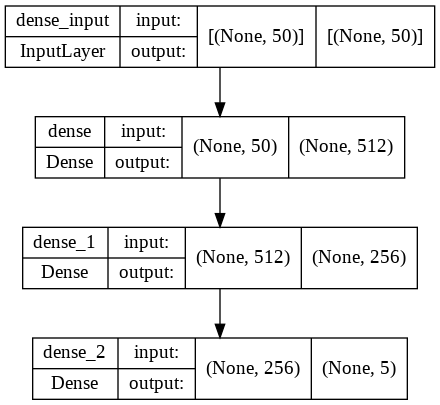

In [195]:
plot_model(bow_model, to_file='bow_model.png', show_shapes=True, show_layer_names=True)

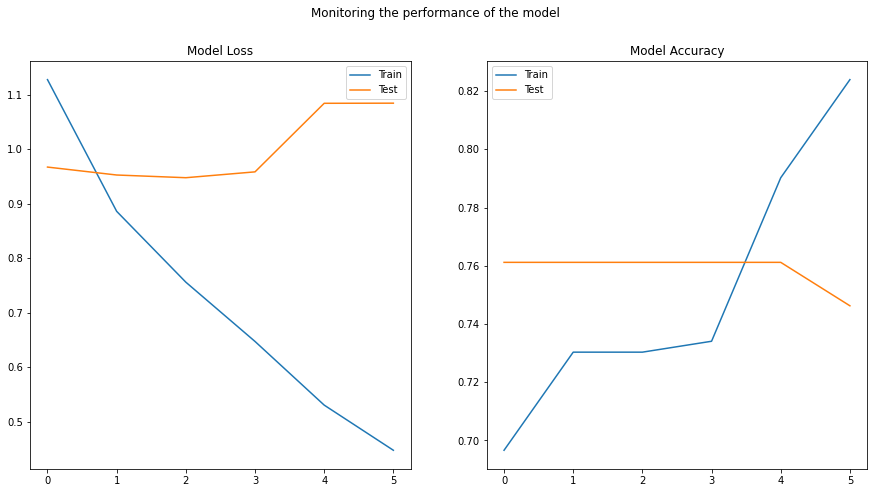

In [196]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.5))
f.suptitle('Monitoring the performance of the model')

ax1.plot(history.history['loss'], label = 'Train')
ax1.plot(history.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(history.history['accuracy'], label = 'Train')
ax2.plot(history.history['val_accuracy'], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

#### For TF-IDF

In [197]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

epochs = 100
batch_size = 12
loss = "categorical_crossentropy"
optimizer = "adam"
metrics = ["accuracy"]

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=3)

# Build neural network
tfidf_model = Sequential()
tfidf_model.add(Dense(512, activation='relu'))
tfidf_model.add(Dense(256, activation='relu'))
tfidf_model.add(Dense(5, activation='softmax'))
tfidf_model.compile(loss=loss, optimizer=optimizer, metrics= metrics)

In [198]:
history=tfidf_model.fit(X_train_tf.toarray(), y_train_dummy, validation_split = 0.2, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

Epoch 1/100
23/23 [==============================] - 1s 9ms/step - loss: 1.1687 - accuracy: 0.6891 - val_loss: 0.8807 - val_accuracy: 0.7612
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.8983 - accuracy: 0.7303 - val_loss: 0.8717 - val_accuracy: 0.7612
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.8205 - accuracy: 0.7303 - val_loss: 0.8885 - val_accuracy: 0.7612
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.7653 - accuracy: 0.7303 - val_loss: 0.8917 - val_accuracy: 0.7612
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7098 - accuracy: 0.7303 - val_loss: 0.9407 - val_accuracy: 0.7612


In [199]:
# evaluate the keras model
_, train_accuracy = tfidf_model.evaluate(X_train_tf.toarray(), y_train_dummy, batch_size=8, verbose=0)
_, test_accuracy = tfidf_model.evaluate(X_test_tf.toarray(), y_test_dummy, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.65
Test accuracy: 75.00


In [200]:
target_type = 'multi_label'
accuracy, precision, recall, f1 = get_classification_metrics(tfidf_model, X_test_tf.toarray(), y_test_dummy, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.726190
Precision: 0.743902
Recall: 0.726190
F1 score: 0.734940


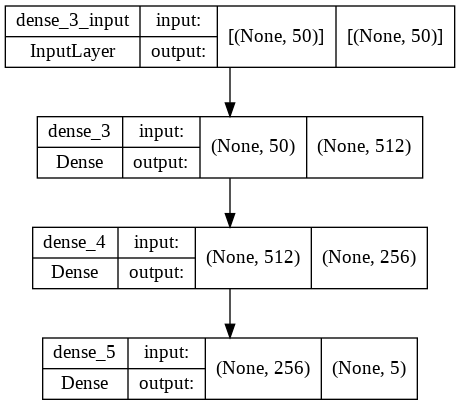

In [201]:
plot_model(tfidf_model, to_file='tfidf_model.png', show_shapes=True, show_layer_names=True)

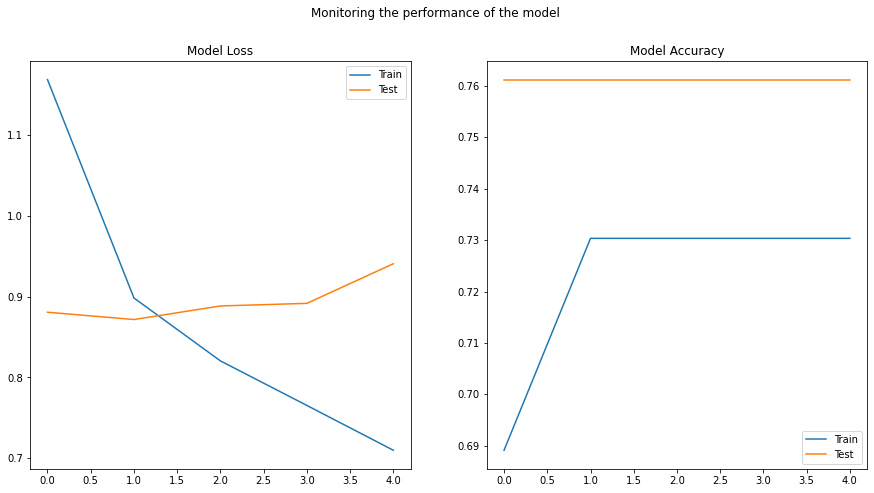

In [202]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.5))
f.suptitle('Monitoring the performance of the model')

ax1.plot(history.history['loss'], label = 'Train')
ax1.plot(history.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(history.history['accuracy'], label = 'Train')
ax2.plot(history.history['val_accuracy'], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

#### For Word to Vec

In [203]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

epochs = 100
batch_size = 10
loss = "categorical_crossentropy"
optimizer = "adam"
metrics = ["accuracy"]

callbacks = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=3)

# Build neural network
cbow_model = Sequential()
cbow_model.add(Dense(512, activation='relu'))
cbow_model.add(Dense(256, activation='relu'))
cbow_model.add(Dense(5, activation='softmax'))
cbow_model.compile(loss=loss, optimizer=optimizer, metrics= metrics)

In [204]:
history=cbow_model.fit(xtrain_w2v, y_train_dummy, validation_data=(xtest_w2v, y_test_dummy), epochs=epochs, batch_size=batch_size, callbacks=callbacks)

Epoch 1/100
34/34 [==============================] - 1s 7ms/step - loss: 1.1388 - accuracy: 0.7096 - val_loss: 0.9075 - val_accuracy: 0.7500
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 0.9417 - accuracy: 0.7365 - val_loss: 0.9049 - val_accuracy: 0.7500
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 0.9319 - accuracy: 0.7365 - val_loss: 0.8996 - val_accuracy: 0.7500
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 0.9367 - accuracy: 0.7365 - val_loss: 0.8991 - val_accuracy: 0.7500
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 0.9382 - accuracy: 0.7365 - val_loss: 0.9040 - val_accuracy: 0.7500
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 0.9300 - accuracy: 0.7365 - val_loss: 0.8965 - val_accuracy: 0.7500
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 0.9267 - accuracy: 0.7365 - val_loss: 0.9098 - val_accuracy: 0.7500
Epoch 8/100
3

In [205]:
# evaluate the keras model
_, train_accuracy = cbow_model.evaluate(xtrain_w2v, y_train_dummy, batch_size=8, verbose=0)
_, test_accuracy = cbow_model.evaluate(xtest_w2v, y_test_dummy, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.65
Test accuracy: 75.00


In [206]:
target_type = 'multi_label'
accuracy, precision, recall, f1 = get_classification_metrics(cbow_model, xtest_w2v, y_test_dummy, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.750000
Precision: 0.750000
Recall: 0.750000
F1 score: 0.750000


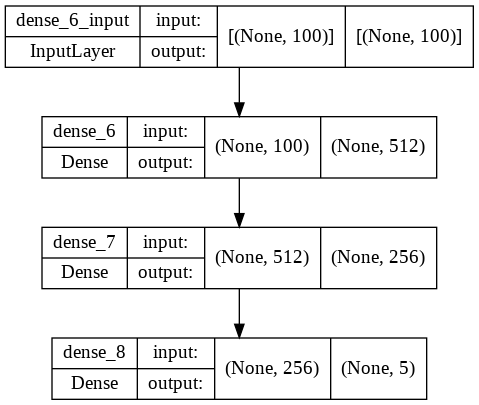

In [207]:
plot_model(cbow_model, to_file='cbow_model.png', show_shapes=True, show_layer_names=True)

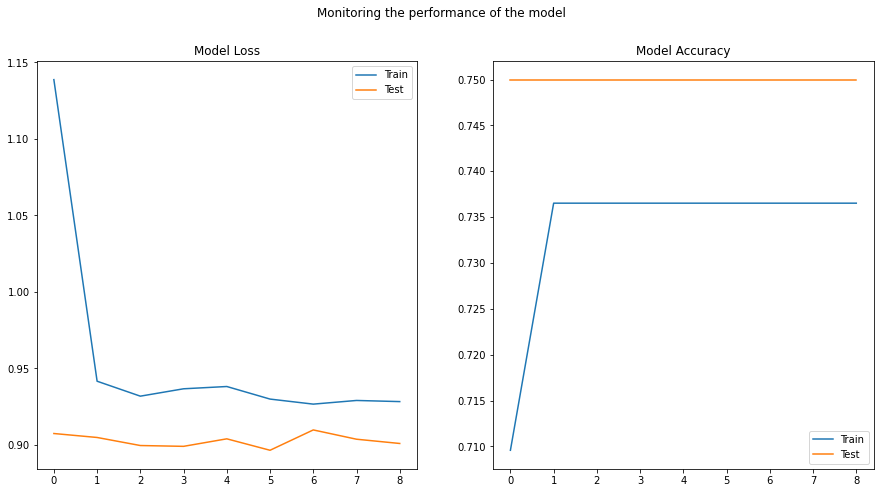

In [208]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.5))
f.suptitle('Monitoring the performance of the model')

ax1.plot(history.history['loss'], label = 'Train')
ax1.plot(history.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(history.history['accuracy'], label = 'Train')
ax2.plot(history.history['val_accuracy'], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

#### For Skipgram

In [209]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

epochs = 100
batch_size = 10
loss = "categorical_crossentropy"
optimizer = "adam"
metrics = ["accuracy"]

callbacks = EarlyStopping(monitor='val_loss', verbose=0, patience=3)

# Build neural network
skipgram_model = Sequential()
skipgram_model.add(Dense(512, activation='relu'))
skipgram_model.add(Dense(256, activation='relu'))
skipgram_model.add(Dense(5, activation='softmax'))
skipgram_model.compile(loss=loss, optimizer=optimizer, metrics= metrics)

In [210]:
history=skipgram_model.fit(xtrain_w2v_sg, y_train_dummy, validation_data=(xtest_w2v_sg, y_test_dummy), epochs=epochs, batch_size=batch_size, callbacks=callbacks)

Epoch 1/100
34/34 [==============================] - 1s 8ms/step - loss: 1.0295 - accuracy: 0.7096 - val_loss: 0.9129 - val_accuracy: 0.7500
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 0.9284 - accuracy: 0.7365 - val_loss: 0.8932 - val_accuracy: 0.7500
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 0.9320 - accuracy: 0.7365 - val_loss: 0.8911 - val_accuracy: 0.7500
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 0.9377 - accuracy: 0.7365 - val_loss: 0.8957 - val_accuracy: 0.7500
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 0.9397 - accuracy: 0.7365 - val_loss: 0.8954 - val_accuracy: 0.7500
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 0.9295 - accuracy: 0.7365 - val_loss: 0.8936 - val_accuracy: 0.7500


In [211]:
# evaluate the keras model
_, train_accuracy = skipgram_model.evaluate(xtrain_w2v_sg, y_train_dummy, batch_size=8, verbose=0)
_, test_accuracy = skipgram_model.evaluate(xtest_w2v_sg, y_test_dummy, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.65
Test accuracy: 75.00


In [212]:
target_type = 'multi_label'
accuracy, precision, recall, f1 = get_classification_metrics(skipgram_model, xtest_w2v_sg, y_test_dummy, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.750000
Precision: 0.750000
Recall: 0.750000
F1 score: 0.750000


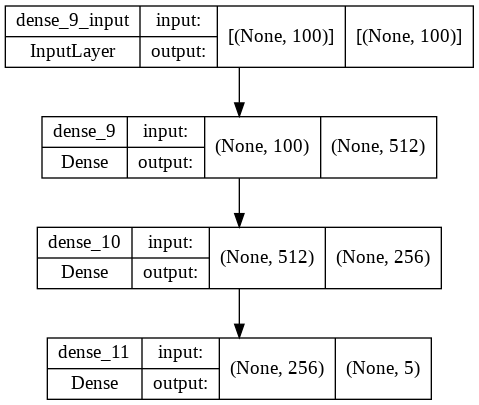

In [213]:
plot_model(skipgram_model, to_file='skipgram_model.png', show_shapes=True, show_layer_names=True)

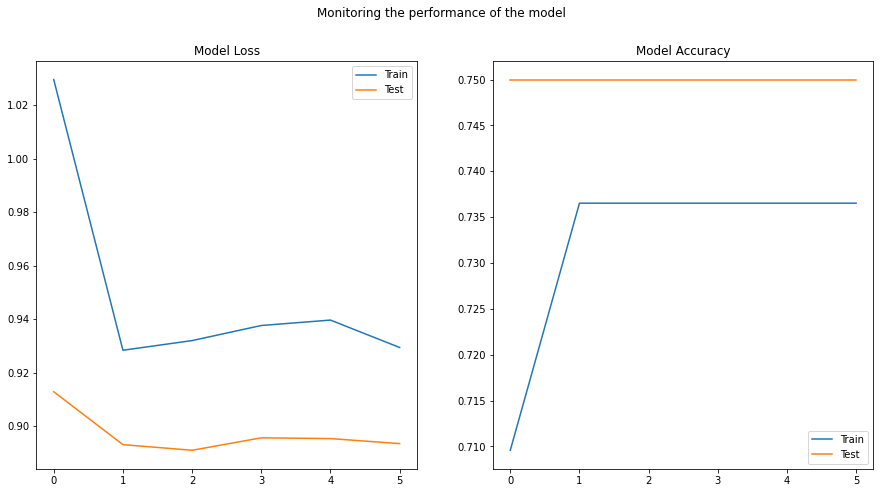

In [214]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.5))
f.suptitle('Monitoring the performance of the model')

ax1.plot(history.history['loss'], label = 'Train')
ax1.plot(history.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(history.history['accuracy'], label = 'Train')
ax2.plot(history.history['val_accuracy'], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

#### For Fasttext


In [215]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

epochs = 100
batch_size = 10
loss = "categorical_crossentropy"
optimizer = "adam"
metrics = ["accuracy"]

callbacks = EarlyStopping(monitor='val_loss', verbose=0, patience=3)

# Build neural network
fasttext_model = Sequential()
fasttext_model.add(Dense(512, activation='relu'))
fasttext_model.add(Dense(256, activation='relu'))
fasttext_model.add(Dense(5, activation='softmax'))
fasttext_model.compile(loss=loss, optimizer=optimizer, metrics= metrics)

In [216]:
history=fasttext_model.fit(xtrain_ft, y_train_dummy, validation_data=(xtest_ft, y_test_dummy), epochs=epochs, batch_size=batch_size, callbacks=callbacks)

Epoch 1/100
34/34 [==============================] - 1s 7ms/step - loss: 1.0119 - accuracy: 0.7096 - val_loss: 0.9030 - val_accuracy: 0.7500
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 0.9292 - accuracy: 0.7365 - val_loss: 0.8884 - val_accuracy: 0.7500
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 0.9298 - accuracy: 0.7365 - val_loss: 0.8852 - val_accuracy: 0.7500
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 0.9371 - accuracy: 0.7365 - val_loss: 0.8908 - val_accuracy: 0.7500
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 0.9367 - accuracy: 0.7365 - val_loss: 0.8870 - val_accuracy: 0.7500
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 0.9264 - accuracy: 0.7365 - val_loss: 0.8882 - val_accuracy: 0.7500


In [217]:
# evaluate the keras model
_, train_accuracy = fasttext_model.evaluate(xtrain_ft, y_train_dummy, batch_size=8, verbose=0)
_, test_accuracy = fasttext_model.evaluate(xtest_ft, y_test_dummy, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.65
Test accuracy: 75.00


In [218]:
target_type = 'multi_label'
accuracy, precision, recall, f1 = get_classification_metrics(fasttext_model, xtest_ft, y_test_dummy, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.750000
Precision: 0.750000
Recall: 0.750000
F1 score: 0.750000


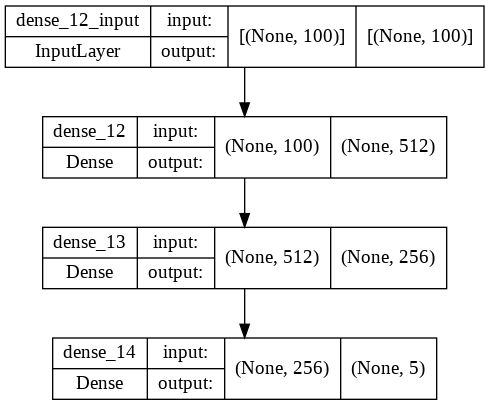

In [219]:
plot_model(fasttext_model, to_file='fasttext_model.png', show_shapes=True, show_layer_names=True)

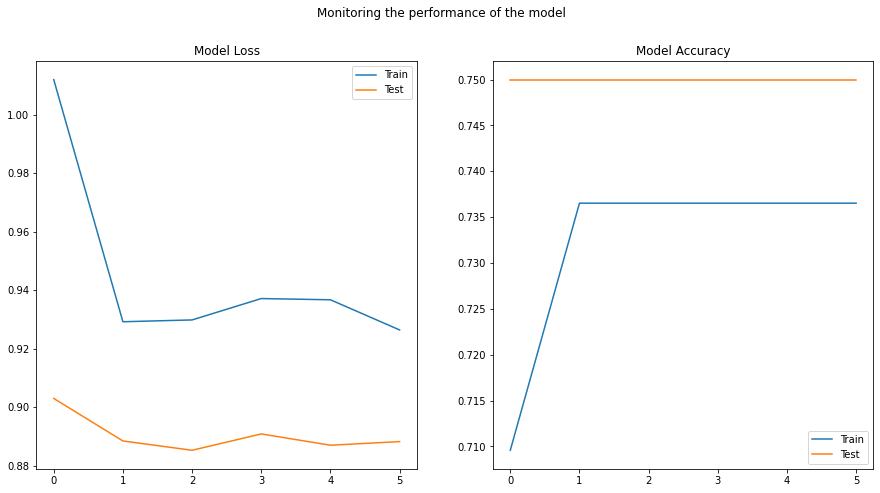

In [220]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.5))
f.suptitle('Monitoring the performance of the model')

ax1.plot(history.history['loss'], label = 'Train')
ax1.plot(history.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(history.history['accuracy'], label = 'Train')
ax2.plot(history.history['val_accuracy'], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

#### For Doc2Vec


In [221]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

epochs = 100
batch_size = 10
loss = "categorical_crossentropy"
optimizer = "adam"
metrics = ["accuracy"]

callbacks = EarlyStopping(monitor='val_loss', verbose=0, patience=3)

# Build neural network
doc2vec_model = Sequential()
doc2vec_model.add(Dense(512, activation='relu'))
doc2vec_model.add(Dense(256, activation='relu'))
doc2vec_model.add(Dense(5, activation='softmax'))
doc2vec_model.compile(loss=loss, optimizer=optimizer, metrics= metrics)

In [222]:
history=doc2vec_model.fit(xtrain_dc, y_train_dummy, validation_data=(xtest_dc, y_test_dummy), epochs=epochs, batch_size=batch_size, callbacks=callbacks)

Epoch 1/100
34/34 [==============================] - 1s 8ms/step - loss: 1.0614 - accuracy: 0.7126 - val_loss: 0.9215 - val_accuracy: 0.7500
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 0.9139 - accuracy: 0.7365 - val_loss: 0.8923 - val_accuracy: 0.7500
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 0.8780 - accuracy: 0.7365 - val_loss: 0.9103 - val_accuracy: 0.7500
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 0.8436 - accuracy: 0.7365 - val_loss: 0.9520 - val_accuracy: 0.7500
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 0.7827 - accuracy: 0.7425 - val_loss: 0.9401 - val_accuracy: 0.7500


In [223]:
# evaluate the keras model
_, train_accuracy = doc2vec_model.evaluate(xtrain_dc, y_train_dummy, batch_size=8, verbose=0)
_, test_accuracy = doc2vec_model.evaluate(xtest_dc, y_test_dummy, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.65
Test accuracy: 75.00


In [224]:
target_type = 'multi_label'
accuracy, precision, recall, f1 = get_classification_metrics(doc2vec_model, xtest_dc, y_test_dummy, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.750000
Precision: 0.750000
Recall: 0.750000
F1 score: 0.750000


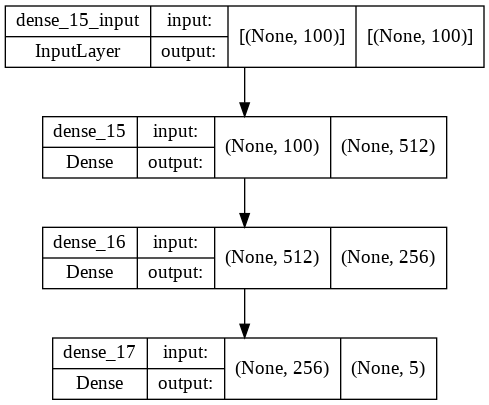

In [225]:
plot_model(doc2vec_model, to_file='doc2vec_model.png', show_shapes=True, show_layer_names=True)

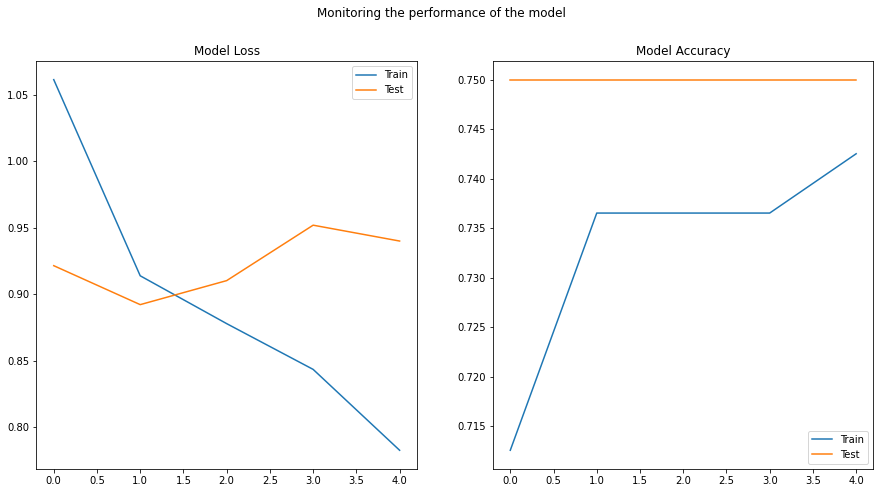

In [226]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.5))
f.suptitle('Monitoring the performance of the model')

ax1.plot(history.history['loss'], label = 'Train')
ax1.plot(history.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(history.history['accuracy'], label = 'Train')
ax2.plot(history.history['val_accuracy'], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

### Step 4: Design, train and test RNN or LSTM classifiers

#### For Glove

In [227]:
# Select input and output features
X_text = df['Processed_Description_Final']
y_text = df['Accident_Level']

In [228]:
# Encode labels in column 'Accident Level'.
y_text = LabelEncoder().fit_transform(y_text)

In [229]:
# Divide our data into testing and training sets:
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text, y_text, test_size = 0.20, random_state = 1, stratify = y_text)

print('X_text_train shape : ({0})'.format(X_text_train.shape[0]))
print('y_text_train shape : ({0},)'.format(y_text_train.shape[0]))
print('X_text_test shape : ({0})'.format(X_text_test.shape[0]))
print('y_text_test shape : ({0},)'.format(y_text_test.shape[0]))

X_text_train shape : (334)
y_text_train shape : (334,)
X_text_test shape : (84)
y_text_test shape : (84,)


In [230]:
# Convert both the training and test labels into one-hot encoded vectors:
y_text_train = np_utils.to_categorical(y_text_train)
y_text_test = np_utils.to_categorical(y_text_test)

In [231]:
# The first step in word embeddings is to convert the words into thier corresponding numeric indexes.
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_text_train)

X_text_train = tokenizer.texts_to_sequences(X_text_train)
X_text_test = tokenizer.texts_to_sequences(X_text_test)

In [232]:
# Sentences can have different lengths, and therefore the sequences returned by the Tokenizer class also consist of variable lengths.
# We need to pad the our sequences using the max length.
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size:", vocab_size)

maxlen = 100

X_text_train = pad_sequences(X_text_train, padding='post', maxlen=maxlen)
X_text_test = pad_sequences(X_text_test, padding='post', maxlen=maxlen)

vocab_size: 2489


In [233]:
# We need to load the built-in GloVe word embeddings
embedding_size = 200
embeddings_dictionary = dict()

glove_file = open('/content/drive/MyDrive/glove.6B.200d.txt', encoding="utf8")
#glove_file = open('glove.6B.200d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()

embedding_matrix = np.zeros((vocab_size, embedding_size))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

len(embeddings_dictionary.values())

400000

In [234]:
from tensorflow.keras.optimizers import SGD
#reset_random_seeds()

# Build a LSTM Neural Network
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(deep_inputs)

LSTM_Layer_1 = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1 = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1 = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1 = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2 = Dropout(0.5, input_shape = (128,))(dense_layer_1)
dense_layer_2 = Dense(64, activation = 'relu')(drop_out_layer_2)
drop_out_layer_3 = Dropout(0.5, input_shape = (64,))(dense_layer_2)

dense_layer_3 = Dense(32, activation = 'relu')(drop_out_layer_3)
drop_out_layer_4 = Dropout(0.5, input_shape = (32,))(dense_layer_3)

dense_layer_4 = Dense(10, activation = 'relu')(drop_out_layer_4)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

dense_layer_5 = Dense(5, activation='softmax')(drop_out_layer_5)
#dense_layer_3 = Dense(5, activation='softmax')(drop_out_layer_3)

# LSTM_Layer_1 = LSTM(128)(embedding_layer)
# dense_layer_1 = Dense(5, activation='softmax')(LSTM_Layer_1)
# model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model = Model(inputs=deep_inputs, outputs=dense_layer_5)
#model = Model(inputs=deep_inputs, outputs=dense_layer_3)

opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [235]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 200)          497800    
                                                                 
 bidirectional (Bidirectiona  (None, 100, 256)         336896    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               32896 

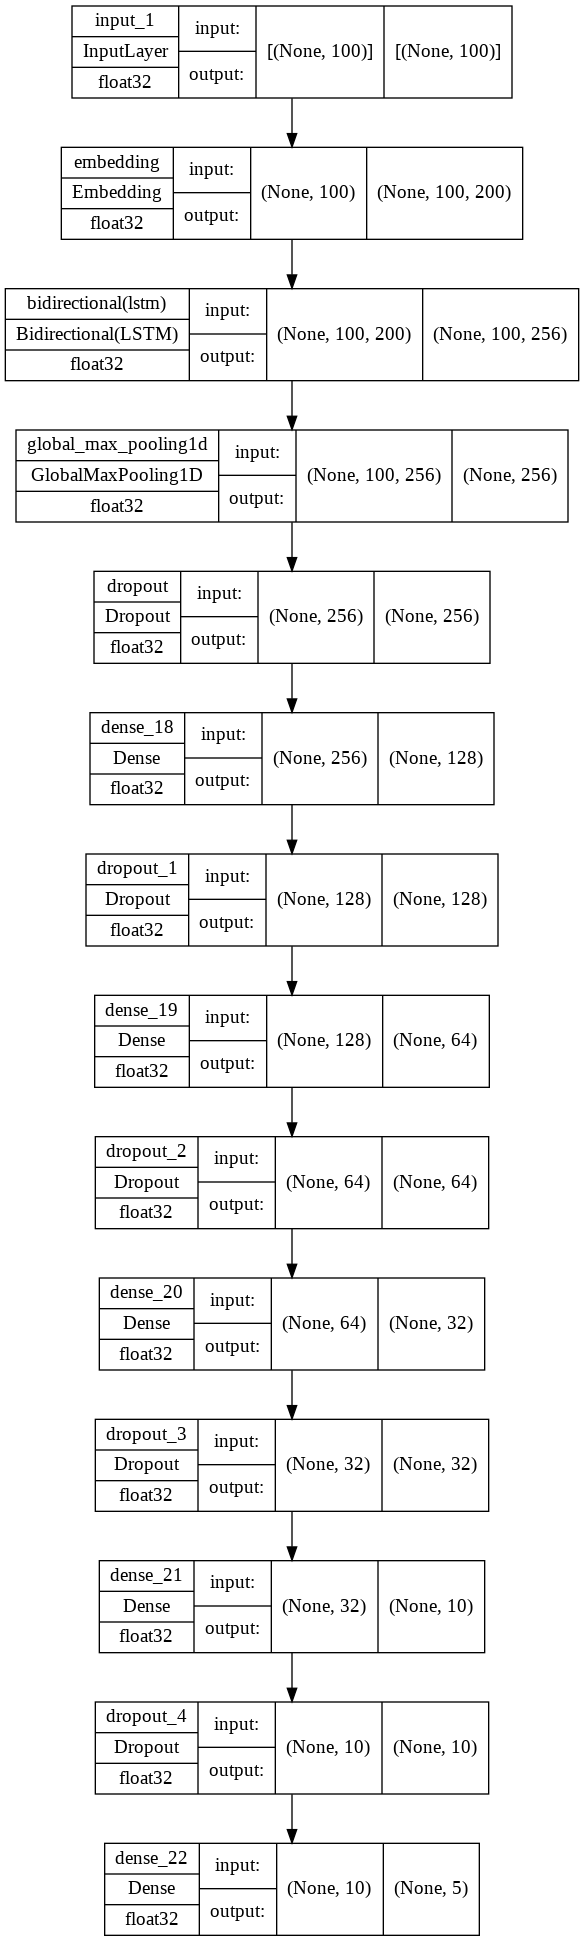

In [236]:
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_dtype=True, show_layer_names=True)

In [237]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
# Use earlystopping
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_text_train, y_text_train, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_text_train, y_text_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_text_test, y_text_test), callbacks=[rlrp, metrics])

Epoch 1/100
42/42 [==============================] - 10s 169ms/step - loss: 1.7069 - acc: 0.2605 - val_loss: 1.4721 - val_acc: 0.7381 - lr: 0.0010
Epoch 2/100
42/42 [==============================] - 6s 136ms/step - loss: 1.4348 - acc: 0.5838 - val_loss: 1.3380 - val_acc: 0.7381 - lr: 0.0010
Epoch 3/100
42/42 [==============================] - 6s 137ms/step - loss: 1.2944 - acc: 0.7036 - val_loss: 1.2305 - val_acc: 0.7381 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 6s 137ms/step - loss: 1.2077 - acc: 0.7335 - val_loss: 1.1464 - val_acc: 0.7381 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 6s 154ms/step - loss: 1.1251 - acc: 0.7395 - val_loss: 1.0878 - val_acc: 0.7381 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 6s 136ms/step - loss: 1.1030 - acc: 0.7395 - val_loss: 1.0501 - val_acc: 0.7381 - lr: 0.0010
Epoch 7/100
42/42 [==============================] - 6s 137ms/step - loss: 1.0572 - acc: 0.7395 - val_loss: 1.0157 - val_ac

In [238]:
# evaluate the keras model
_, train_accuracy = model.evaluate(X_text_train, y_text_train, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate(X_text_test, y_text_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.95
Test accuracy: 73.81


In [239]:
accuracy, precision, recall, f1 = get_classification_metrics(model, X_text_test, y_text_test, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.738095
Precision: 0.738095
Recall: 0.738095
F1 score: 0.738095


Text(0.5, 1.0, 'Training and validation loss')

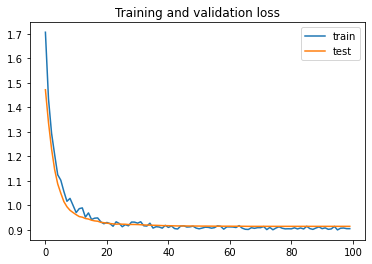

In [240]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Text(0.5, 1.0, 'Training and validation accuracy')

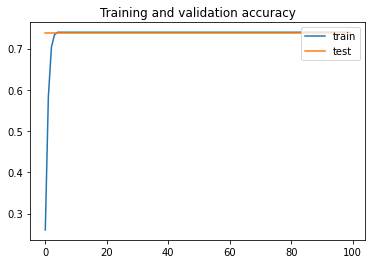

In [241]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

#### Fixing class imbalance

#### Using Smote

In [242]:
df['text_length'] = [len(i.split()) for i in df.Processed_Description_Final] 

print('min length:',df.text_length.min(), '\t' ,'max length:', df.text_length.max())

min length: 9 	 max length: 93


In [243]:
max_features = 10000
maxlen = df.text_length.max()      # Add your max length here

# Tokeninzing the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Processed_Description_Final'])

In [244]:
# Transforming each text to a sequence of integers.
X = tokenizer.texts_to_sequences(df['Processed_Description_Final'])
#------------------------------------------------------------

# Get the Vocabulary size
vocab_size = len(tokenizer.word_index)
#-------------------------------------------------------------

# Padding the sequences to ensure that all sequences in a list have the same length
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['Accident_Level'])
#-------------------------------------------------------------

print("Number of Samples:", len(X))

Number of Samples: 418


In [245]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(df['Accident_Level'].to_list())
print('Before',counter)

# oversampling the train dataset using SMOTE
smt = SMOTE()
labels = df['Accident_Level'].tolist()
X_smote, y_smote = smt.fit_resample(X, y)

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, stratify=y_smote, random_state=1)   

counter = Counter(y_train_smote)
print('After',counter)

Before Counter({0: 309, 1: 40, 2: 31, 3: 30, 4: 8})
After Counter({1: 232, 2: 232, 4: 232, 3: 231, 0: 231})


In [246]:
X_smote

array([[   0,    0,    0, ...,   89,  343,  307],
       [   0,    0,    0, ...,  222, 1496, 1497],
       [   0,    0,    0, ...,   12,    3,    9],
       ...,
       [   0,    0,    0, ...,  218,  141,  220],
       [   0,    0,    0, ...,  226,  596,  819],
       [   0,    0,    0, ...,  488,  460,  900]], dtype=int32)

In [247]:
X_train_smote.shape

(1158, 93)

In [248]:
X_test_smote.shape

(387, 93)

In [249]:
build_model_train(X_train_smote, y_train_smote, X_test_smote, y_test_smote)

Model  Accuracy score Train  Accuracy score Test  Train F1 Score  \
0          LogReg              0.849741             0.806202        0.842372   
1             SVM              0.968048             0.901809        0.967576   
2     Naive Bayes              0.365285             0.356589        0.322730   
3             KNN              0.876511             0.842377        0.855129   
4   Random Forest              1.000000             0.961240        1.000000   
5         Bagging              1.000000             0.940568        1.000000   
6        AdaBoost              0.531088             0.503876        0.530029   
7  Gradient Boost              0.964594             0.870801        0.964017   
8         XGBoost              0.994819             0.906977        0.994803   

   Test F1 Score  Train Recall  Test Recall  Train Precision  Test Precision  
0       0.781922      0.849741     0.806202         0.847312        0.799626  
1       0.897885      0.968048     0.901809         0.968267        0.902904  
2       0.307809      0.365285     0.356589         0.707532        0.686898  
3       0.810251      0.876511     0.842377         0.895862        0.870510  
4       0.960988      1.000000     0.961240         1.000000        0.961362  
5       0.938601      1.000000     0.940568         1.000000        0.941986  
6       0.517748      0.531088     0.503876         0.577653        0.588997  
7       0.863954      0.964594     0.870801         0.966073        0.870032  
8       0.903848      0.994819     0.906977         0.994833        0.910956

#### Using Neural Network for BOW model after balancing the class

In [250]:
# Implementing Neural Networks Bag-of-words model after balancing the class. 

epochs = 100
batch_size = 12
loss = "categorical_crossentropy"
optimizer = "adam"
metrics = ["accuracy"]

# early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=3)

# Build neural network
smote_model = Sequential()
smote_model.add(Dense(512, activation='relu'))
smote_model.add(Dense(256, activation='relu'))
smote_model.add(Dense(5, activation='softmax'))
smote_model.compile(loss=loss, optimizer=optimizer, metrics= metrics)

In [251]:
y_train_smote_dummy = pd.get_dummies(y_train_smote) # One-hot encoding
y_test_smote_dummy = pd.get_dummies(y_test_smote) # One-hot encoding

history=smote_model.fit(X_train_smote, y_train_smote_dummy, epochs=epochs, validation_data=(X_test_smote, y_test_smote_dummy), batch_size=batch_size)

Epoch 1/100
97/97 [==============================] - 1s 5ms/step - loss: 52.2823 - accuracy: 0.6684 - val_loss: 17.1949 - val_accuracy: 0.8320
Epoch 2/100
97/97 [==============================] - 0s 3ms/step - loss: 4.9804 - accuracy: 0.9033 - val_loss: 2.3816 - val_accuracy: 0.9199
Epoch 3/100
97/97 [==============================] - 0s 4ms/step - loss: 3.1159 - accuracy: 0.9361 - val_loss: 6.5071 - val_accuracy: 0.8863
Epoch 4/100
97/97 [==============================] - 0s 4ms/step - loss: 3.3022 - accuracy: 0.9430 - val_loss: 4.4777 - val_accuracy: 0.9354
Epoch 5/100
97/97 [==============================] - 0s 4ms/step - loss: 1.8879 - accuracy: 0.9620 - val_loss: 12.9964 - val_accuracy: 0.8579
Epoch 6/100
97/97 [==============================] - 0s 4ms/step - loss: 1.7421 - accuracy: 0.9672 - val_loss: 3.5991 - val_accuracy: 0.9225
Epoch 7/100
97/97 [==============================] - 0s 3ms/step - loss: 0.3999 - accuracy: 0.9914 - val_loss: 2.2872 - val_accuracy: 0.9483
Epoch 8/10

In [252]:
# Validating the model on test set
y_test_smote_dummy = pd.get_dummies(y_test_smote)
loss, accuracy = smote_model.evaluate(X_test_smote, y_test_smote_dummy, verbose = 0)
loss, accuracy

(5.8238677978515625, 0.9457364082336426)

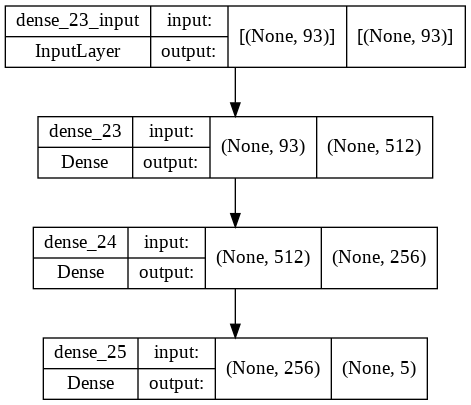

In [253]:
plot_model(smote_model, to_file='smote_model.png', show_shapes=True, show_layer_names=True)

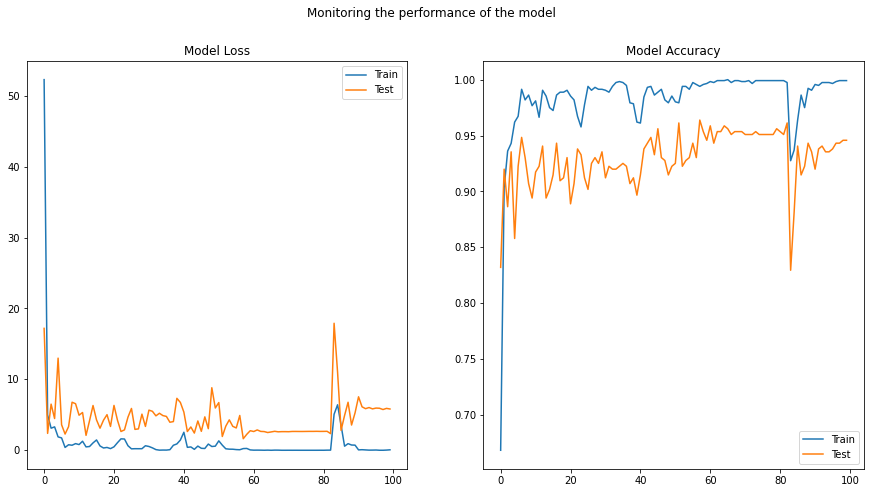

In [254]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.5))
f.suptitle('Monitoring the performance of the model')

ax1.plot(history.history['loss'], label = 'Train')
ax1.plot(history.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(history.history['accuracy'], label = 'Train')
ax2.plot(history.history['val_accuracy'], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

#### Text Augmentation

In [255]:
df_text = df.copy()  #tried augmenting all 
df_text.head()

Date   Countries  Local Industry Sector  Accident_Level  \
0 2016-01-01  Country_01      1          Mining               0   
1 2016-01-02  Country_02      2          Mining               0   
2 2016-01-06  Country_01      3          Mining               0   
3 2016-01-08  Country_01      4          Mining               0   
4 2016-01-10  Country_01      4          Mining               3   

   Potential Accident Level Gender Employee or Third Party  \
0                         3   Male             Third Party   
1                         3   Male                Employee   
2                         2   Male    Third Party (Remote)   
3                         0   Male             Third Party   
4                         3   Male             Third Party   

         Critical Risk                                        Description  \
0              Pressed  While removing the drill rod of the Jumbo 08 f...   
1  Pressurized Systems  During the activation of a sodium sulphide pum...   
2         Manual Tools  In the sub-station MILPO located at level +170...   
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...   
4               Others  Approximately at 11:45 a.m. in circumstances t...   

   Year    Month                        Processed_Description_Final  \
0  2016  January  removing drill rod jumbo maintenance superviso...   
1  2016  January  activation sodium sulphide pump piping uncoupl...   
2  2016  January  substation milpo located level collaborator ex...   
3  2016  January  approximately nv personnel begin task unlockin...   
4  2016  January  approximately circumstance mechanic anthony gr...   

   text_length  
0           37  
1           27  
2           28  
3           47  
4           42

In [256]:
import pandas as pd
translator = google_translator()

In [257]:

# Generating more data for minority classes in dependent variable Using Back Translation

translator = google_translator()  
def backTranslate(text):
    translate_text = translator.translate(text, lang_tgt='pt-br')  
    translate_text = translator.translate(translate_text, lang_tgt='en') 
    return translate_text 

In [258]:
df_text['Description']=df_text['Description'].apply(lambda x: translator.translate(x,lang_tgt ='pt-br'))

In [259]:
df_text['Description']=df_text['Description'].apply(lambda x: translator.translate(x,lang_tgt ='en'))

In [260]:
# Concatenating the new datapoints extracted from the backtranslation technique with the original dataset 
new_df_text = pd.concat([df_text, df.drop_duplicates()]).reset_index(drop = True)
new_df_text = new_df_text.drop_duplicates()
new_df_text.count()

Date                           836
Countries                      836
Local                          836
Industry Sector                836
Accident_Level                 836
Potential Accident Level       836
Gender                         836
Employee or Third Party        836
Critical Risk                  836
Description                    836
Year                           836
Month                          836
Processed_Description_Final    836
text_length                    836
dtype: int64

In [261]:
new_df_text.head(2)

Date   Countries  Local Industry Sector  Accident_Level  \
0 2016-01-01  Country_01      1          Mining               0   
1 2016-01-02  Country_02      2          Mining               0   

   Potential Accident Level Gender Employee or Third Party  \
0                         3   Male             Third Party   
1                         3   Male                Employee   

         Critical Risk                                        Description  \
0              Pressed  When removing the jumbo 08 perforation rod for...   
1  Pressurized Systems  During the activation of a sodium sulfide pump...   

   Year    Month                        Processed_Description_Final  \
0  2016  January  removing drill rod jumbo maintenance superviso...   
1  2016  January  activation sodium sulphide pump piping uncoupl...   

   text_length  
0           37  
1           27

In [262]:
def des_cleaning(text):

    # Initialize the object for Lemmatizer class
    lemmatizer = nltk.stem.WordNetLemmatizer()

    # Set the stopwords to English
    stopwords = nltk.corpus.stopwords.words('english')

    # Normalize the text in order deal with accented words and unicodes
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())

    # Consider only alphabets and numbers from the text
    words = re.sub(r'[^a-zA-Z.,!?/:;\"\'\s]', '', text).split()

    # Consider the words which are not in stopwords of english and lemmatize them
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lems = [lemmatizer.lemmatize(i) for i in words if i not in stopwords]

    # #remove non-alphabetical characters like '(', '.' or '!'
    # alphas = [i for i in lems if (i.isalpha() or i.isnumeric()) and (i not in stopwords)]

    words = [w for w in lems if len(w)>2]

    return words

In [263]:
# Nlp preprocessing on the augumented text data
new_df_text['Augmented'] = new_df_text.apply(lambda x: " ".join(des_cleaning(x.Description)), axis=1)

In [264]:
new_df_text.Accident_Level.value_counts(), df['Accident_Level'].value_counts()

(0    618
 1     80
 2     62
 3     60
 4     16
 Name: Accident_Level, dtype: int64, 0    309
 1     40
 2     31
 3     30
 4      8
 Name: Accident_Level, dtype: int64)

In [265]:
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(new_df_text['Augmented'], new_df_text['Accident_Level'], test_size=0.3, random_state=42)

print('Training utterances: {}'.format(X_train_aug.shape[0]))
print('Validation utterances: {}'.format(X_test_aug.shape[0]))

Training utterances: 585
Validation utterances: 251


#### Text Augmentation

In [266]:
# Import libraries
try:
    import textaugment, gensim
except ModuleNotFoundError:
    !pip -q install textaugment gensim
    import textaugment, gensim

from textaugment import Wordnet

pf = pd.concat([pd.DataFrame(X_train_aug, columns =["Augmented"]).reset_index(drop = True), 
                pd.DataFrame(y_train_aug, columns =["Accident_Level"]).reset_index(drop = True)], axis =1)
pf.head()

     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 1.4 MB 47.1 MB/s 
     |████████████████████████████████| 65 kB 3.9 MB/s 
     |████████████████████████████████| 53 kB 2.8 MB/s 


Augmented  Accident_Level
0  approx. hours. mr. eliseo secondary crush oper...               2
1  employee preparing rice using utensil type ski...               1
2  time worker another partner preparing move oil...               2
3  transport piece wood aid hand cart, employee f...               0
4  material washing process becker, end material ...               0

In [267]:
y_train_aug = le.fit_transform(y_train_aug).astype(np.int8)
pf.Accident_Level = le.fit_transform(pf.Accident_Level).astype(np.int8)
y_train_aug[0:3]

array([2, 1, 2], dtype=int8)

In [268]:
text = np.array(pf[(pf['Accident_Level'] == 0) | (pf['Accident_Level'] == 4) | (pf['Accident_Level'] == 1)]['Augmented'], dtype = str)
ytext = np.array(pf[(pf['Accident_Level'] == 0) | (pf['Accident_Level'] == 4) | (pf['Accident_Level'] == 1)]['Accident_Level'], dtype = np.int8)
ytext.dtype

dtype('int8')

In [269]:
from collections import Counter
counter = Counter(y_train_aug)
print('Before',counter) # Accident Level Distribution for training Data

Before Counter({0: 429, 1: 57, 2: 48, 3: 43, 4: 8})


#### Performing augmentation on training data -- Can be ignored for now

In [270]:
# This functions takes in text to be augmented, its target as well as the augmentation model used and adds augmented rows to Training data
augmentedtxt = pd.DataFrame()

# AS OF NOW WE ARE NOT USING THIS TRAINING SET FOR OUR MODEL 
def augment(txtarray, ytxtarray, model):
    #create an empty dataframe
    pf_text = pd.DataFrame()

    # loop through all rows and augment data, also append it to the df created
    for i,x in enumerate(txtarray):
        taug = model.augment(str(x))
        if taug == str(x):
            continue
            # do not add duplicate data if augmentation doesnt modify the text
        else:
            pf_text = pf_text.append(pd.Series([taug,ytxtarray[i].astype(np.int8)], index = ['Augmented', 'Accident_Level']), ignore_index=True)
    #concatenating augmented data with the existing training dataframe
    final = pd.concat([pf_text, pf])
    augmentedtxt.append(pf_text)
    #updating the training data set
    X_train_aug = np.array(final.Augmented)
    y_train_aug = np.array(final.Accident_Level.astype(np.int8))
    #See the counts of target variale within the training set
    counter = Counter(y_train_aug)
    print('After',counter)
    return final.reset_index(drop = True)

In [271]:
import nltk
nltk.download('averaged_perceptron_tagger')
t = Wordnet(n=True, p=0.7)
pf = augment(text, ytext,t)
pf['Accident_Level'] = pf['Accident_Level'].astype(np.int8)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


After Counter({0: 851, 1: 114, 2: 48, 3: 43, 4: 16})


In [272]:
ftext = np.array(pf[pf['Accident_Level'] == 4], dtype = str)
fytext = np.array(pf[pf['Accident_Level'] == 4]['Accident_Level'], dtype = np.int8)

In [273]:
from textaugment import Translate
#t = Translate(src="en", to="pt")
t = Wordnet( p=0.6, runs =5)
pf =augment(ftext, fytext,t)

After Counter({0: 851, 1: 114, 2: 48, 3: 43, 4: 32})


In [274]:
#Adding augmented data from minority classes into main data set
new_df_text = pd.concat([new_df_text, augmentedtxt], axis=1)

In [275]:
# Getting the length of the each description
pf['sen_length'] = [len(i.split()) for i in pf['Augmented']] 

print('min length:', pf.sen_length.min(), '\t' ,'max length:', pf.sen_length.max())

min length: 8 	 max length: 107


In [276]:
# Tokeninzing the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(new_df_text['Augmented'])

In [277]:
# Transforming each text to a sequence of integers.
X = tokenizer.texts_to_sequences(new_df_text['Augmented'])
#------------------------------------------------------------

# Padding the sequences to ensure that all sequences in a list have the same length
X = pad_sequences(X, maxlen = pf.sen_length.max())
#-------------------------------------------------------------

print("Number of Samples:", len(X))

Number of Samples: 836


In [278]:
counter = Counter(new_df_text['Accident_Level'].to_list())
print('Before',counter)

# oversampling the train dataset using SMOTE
smt = SMOTE()
labels = new_df_text['Accident_Level'].tolist()
X_smote, y_smote = smt.fit_resample(X, labels)

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, stratify=y_smote, random_state=1)   

counter = Counter(y_train_smote)
print('After',counter)

Before Counter({0: 618, 1: 80, 2: 62, 3: 60, 4: 16})
After Counter({1: 464, 2: 464, 4: 463, 3: 463, 0: 463})


In [279]:
build_model_train(X_train_smote, y_train_smote, X_test_smote, y_test_smote)

Model  Accuracy score Train  Accuracy score Test  Train F1 Score  \
0          LogReg              0.761761             0.738680        0.751536   
1             SVM              0.953820             0.931436        0.952886   
2     Naive Bayes              0.311178             0.322122        0.251963   
3             KNN              0.891670             0.869340        0.877572   
4   Random Forest              0.998705             0.963777        0.998706   
5         Bagging              0.998274             0.941785        0.998275   
6        AdaBoost              0.515753             0.469599        0.514916   
7  Gradient Boost              0.906776             0.844761        0.903784   
8         XGBoost              0.974968             0.891332        0.974835   

   Test F1 Score  Train Recall  Test Recall  Train Precision  Test Precision  
0       0.715435      0.761761     0.738680         0.750774        0.718506  
1       0.929901      0.953820     0.931436         0.956564        0.934499  
2       0.269848      0.311178     0.322122         0.707646        0.720732  
3       0.848278      0.891670     0.869340         0.905280        0.890261  
4       0.963316      0.998705     0.963777         0.998714        0.964696  
5       0.940269      0.998274     0.941785         0.998279        0.943446  
6       0.470235      0.515753     0.469599         0.534918        0.485482  
7       0.836094      0.906776     0.844761         0.910557        0.847583  
8       0.888077      0.974968     0.891332         0.975814        0.894947

#### Using Cross Validation for Bagging Classifier

In [280]:
# Here implementing cross validation using bagging classifer as it is giving the bettwe accuracy compared to other ML models
from sklearn.model_selection import train_test_split, cross_val_score
Bag_clf = BaggingClassifier(base_estimator = RandomForestClassifier(n_estimators=150, max_features='sqrt'), 
                            n_estimators=200,
                            random_state=52)

scores =[]
def model(algo, x, y):  # defining a function
    cross_val = cross_val_score(algo, x, y, cv=3) # 3 splits
    print ('************************')
    scores.append(cross_val)

    # Report Performance
    print ("cv-mean score :",'{:.2f}%'.format(cross_val.mean()*100)) # printing the average of all the 3 scores
    print ("cv-std  :",'{:.2f}%'.format(cross_val.std()*100))   # printing the standard deviation to check the spread among all the scores

In [281]:
print('Bagging classifier cv score')
model(Bag_clf, X_smote, y_smote)

Bagging classifier cv score
************************
cv-mean score : 95.99%
cv-std  : 0.83%


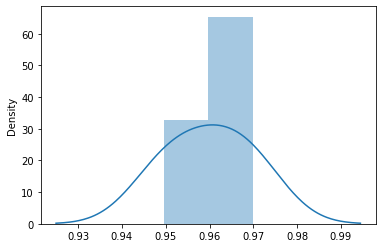

95% confidence interval 94.3% and 97.7%


In [282]:
# plot scores
sns.distplot(scores)
plt.show()
# confidence intervals
alpha = 95       # for 95% confidence level
lower =  np.mean(scores)-(np.std(scores)*2) # minus two standard deviation
upper = np.mean(scores)+(np.std(scores)*2)  # plus two standard deviation
print('{}% confidence interval {:.1f}% and {:.1f}%'.format(alpha, lower*100, upper*100))

#### Bagging classifier giving best results using smote

In [283]:
Bag_clf = BaggingClassifier(base_estimator = RandomForestClassifier(n_estimators=100, max_features='sqrt'), 
                            n_estimators=200,
                            random_state=52)
                            
Bag_clf.fit(X_train_smote, y_train_smote) # fitting the model 
print('\nTest score:', '{:.2f}%'.format(Bag_clf.score(X_test_smote, y_test_smote)*100)) # evaluating it on test set


Test score: 96.38%


	***********Classification Report*********** 
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       137
           1       0.97      0.95      0.96       158
           2       0.99      0.95      0.97       160
           3       0.99      0.94      0.96       163
           4       1.00      1.00      1.00       155

    accuracy                           0.96       773
   macro avg       0.96      0.96      0.96       773
weighted avg       0.97      0.96      0.96       773



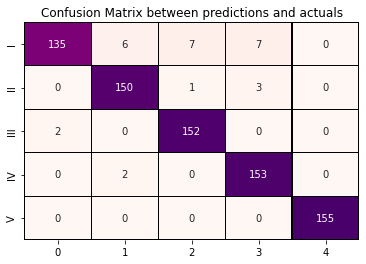

In [284]:
# Making predictions on test data
y_pred = Bag_clf.predict(X_test_smote)
print('\t***********Classification Report*********** \n', classification_report(y_pred, y_test_smote))
 
# Creation of confusion matrix
cm = confusion_matrix(y_test_smote, y_pred)
cm = pd.DataFrame(cm, index = ['I', 'II', 'III', 'IV', 'V'] , columns = [0, 1, 2, 3, 4])
 
# Plotting the confusion matrix
plt.title('Confusion Matrix between predictions and actuals')
sns.heatmap(cm, annot=True, fmt = '', cbar=False, cmap='RdPu', linecolor='black', linewidths=0.1);

In [285]:
from sklearn.metrics import roc_curve
# roc_curve() which computes the ROC for classifier. It returns the FPR, TPR, and threshold values

pred_prob = Bag_clf.predict_proba(X_test_smote)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class): # looping on number of classes and computing three metrics for each class
    # Compute Receiver operating characteristic (ROC), the function returns
    fpr[i], tpr[i], thresh[i] = roc_curve(y_true = le.fit_transform(y_test_smote), y_score = pred_prob[:,i], pos_label=i)

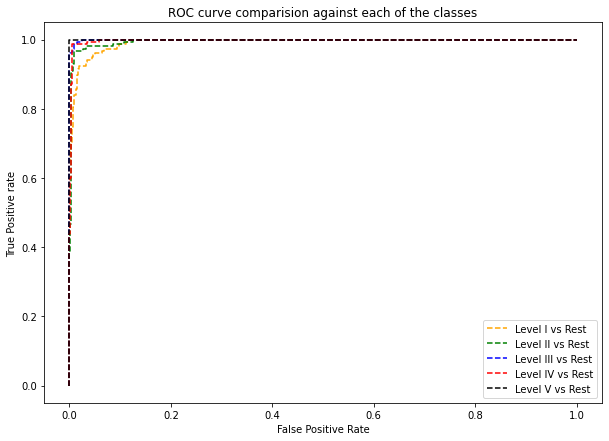

In [286]:
# plotting
plt.figure(figsize=(10,7))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Level I vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Level II vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Level III vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Level IV vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Level V vs Rest')

plt.title('ROC curve comparision against each of the classes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 424
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         418 non-null    datetime64[ns]
 1   Countries                    418 non-null    object        
 2   Local                        418 non-null    int64         
 3   Industry Sector              418 non-null    object        
 4   Accident_Level               418 non-null    int64         
 5   Potential Accident Level     418 non-null    int64         
 6   Gender                       418 non-null    object        
 7   Employee or Third Party      418 non-null    object        
 8   Critical Risk                418 non-null    object        
 9   Description                  418 non-null    object        
 10  Year                         418 non-null    int64         
 11  Month                        418 non-null    

### Step 5: Choose the best performing model classifier and pickle it.

In [288]:
#Pickle file used to store the model

import pickle
#Bag_clf.fit(X_smote, y_smote)
pickle.dump(Bag_clf, open('nlp_chatbot.sav','wb'))

## Milestone 3

### Input: Pickled model from milestone 2

### Process

### Step 1: Design a clickable UI which can automate tasks performed under milestone 1

### Step 2: Design a clickable UI which can automate tasks performed under milestone 2

### Step 3: Design a clickable UI based chatbot interface

#### Function used for UI integration -- takes description as input vectorizes and predicts it via our bagging classifier


In [289]:
# Function used for UI integration -- takes description as input vectorizes and predicts it via our bagging classifier Covers Steps 1 and 2 which does the stuff for Milestone 1 and Milestone 2.
def predict(message):
    data = " ".join(des_cleaning(message))
    print(data)
    x = tokenizer.texts_to_sequences([data])
    # Padding the sequences to ensure that all sequences in a list have the same length
    message = pad_sequences(x, maxlen = 107)
    my_prediction = Bag_clf.predict(message)
    print(my_prediction)
    if my_prediction == 0:
        my_prediction = 'Accident Level I'
    elif my_prediction == 1:
        my_prediction = 'Accident Level II'
    elif my_prediction == 2:
        my_prediction = 'Accident Level III'
    elif my_prediction == 3:
        my_prediction = 'Accident Level IV'
    else: 
        my_prediction = 'Accident Level V'
    return my_prediction

**For Prediction of Accident Level 1**

In [290]:
predict("The worker Manuel was making the disconnection of the power cables of the gate that is at the intersection of Manco streets with Cajamarquilla in order to remove it. In circumstances that Mr. JosÃ© worker of the company ITS, was removing the rope tied in the body of the gate, this yields and falls pulling the warning post which hits the helmet of Mr. who He was standing at his side.")

worker manuel making disconnection power cable gate intersection manco street cajamarquilla order remove it. circumstance mr. josa worker company its, removing rope tied body gate, yield fall pulling warning post hit helmet mr. standing side.
[0]


'Accident Level I'

**For Prediction of Accident Level 2**

In [291]:
predict("During the withdrawal of the metal form support screw in the Inside of well 2, when the bolt of the chain holder was loosened, the employee and a helper exerted force on the combination wrench, when the bolt came to loosen immediately, pressing the ring finger of the employee's right hand against the support.")

withdrawal metal form support screw inside well bolt chain holder loosened, employee helper exerted force combination wrench, bolt came loosen immediately, pressing ring finger employee's right hand support.
[1]


'Accident Level II'

**For Prediction of Accident Level 3**

In [292]:
predict('In the city of Conchucos, of Ancash, participating in a patronal feast, representing the company, was mounted on a horse as part of the ceremony throwing fruits and toys to the people attending this public event, the noise of the materials pyrotechnics and people trying to collect the gifts caused the horse in front and very close to her horse to be frightened and kicked back hitting the lower limbs.')

city conchucos, ancash, participating patronal feast, representing company, mounted horse part ceremony throwing fruit toy people attending public event, noise material pyrotechnic people trying collect gift caused horse front close horse frightened kicked back hitting lower limbs.
[2]


'Accident Level III'

**For Prediction of Accident Level 4**

In [293]:
predict('When observing the pulp overflow of the overflow reception drawer of the thickener, the filter operator approaches to verify the operation of the C7-26 pump, making sure that it was stopped. So press the keypad to start the pump and not getting the start, proceeds to remove the guard and manipulates the motor - pump transmission strips, being left hand imprisoned between the pulley of motor and transmission belt')

observing pulp overflow overflow reception drawer thickener, filter operator approach verify operation pump, making sure stopped. press keypad start pump getting start, proceeds remove guard manipulates motor pump transmission strips, left hand imprisoned pulley motor transmission belt
[3]


'Accident Level IV'

**For Prediction of Accident Level 5**

In [294]:
predict('Being approximately 20:57 hours of 03/22/2017; during the change of cables between the Z-332 power cell (locked cabinet) and the Z014 transformer; there is a loud noise followed by an oscillation of the electrical system. At that moment the collaborator Queneche  the company EISSA is found on the floor with his head inside an adjoining cell Z-132 (cabinet Not blocked - where he was not assigned to do any work), after having received an electric shock .')

approximately hour //; change cable power cell locked cabinet transformer; loud noise followed oscillation electrical system. moment collaborator queneche company eissa found floor head inside adjoining cell cabinet blocked assigned work, received electric shock
[4]


'Accident Level V'

In [ ]:
#Creating GUI with tkinter
!pip install tkinter
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.
import tkinter
from tkinter import *
import random as r
import keras
#import NLP_Chatbot_Milestone_3 as NPro2

def send():
    msg = EntryBox.get("1.0",'end-1c').strip()
    EntryBox.delete("0.0",END)

    if msg != '':
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "You: " + msg + '\n\n')
        ChatLog.config(foreground="#442265", font=("Verdana", 12 ))
        if msg.lower()=='hi' or msg.lower()=='hello' or msg.lower()=='howdy':
            res= r.choice(['Hi','Hello','How can I help you'])
        elif msg.lower()=='place' or msg.lower()=='where' or msg.lower()=='location' or msg.lower()=='country':
            res= r.choice(['Brazil','12 Cities in Brazil','Location is Brazil']) 
        elif msg.lower()=='name' or msg.lower()=='called' or msg.lower()=='usage' or msg.lower()=='nick name':
            res= r.choice(['Predict Bot','I am called Predict Bot','I go by the name Predict Bot','I am Predict Bot and I predict Accidents'])
        elif msg.lower()=='bye' or msg.lower()=='bye bye' or msg.lower()=='stop' or msg.lower()=='exit':
            res= r.choice(['Bye Bye','C u soon','So happy to help you.. C u soon'])
        #res = chatbot_response(msg)
        else:
            res=predict(msg)

        ChatLog.insert(END, "Predict Bot: " + res + '\n\n')

        ChatLog.config(state=DISABLED)
        ChatLog.yview(END)

base = Tk()
base.title("Welcome to Predict Bot")
base.geometry("400x500")
base.resizable(width=FALSE, height=FALSE)

#Create Chat window
ChatLog = Text(base, bd=0, bg="white", height="8", width="50", font="Arial",)

ChatLog.config(state=DISABLED)

#Bind scrollbar to Chat window
scrollbar = Scrollbar(base, command=ChatLog.yview, cursor="heart")
ChatLog['yscrollcommand'] = scrollbar.set

#Create Button to send message
SendButton = Button(base, font=("Verdana",12,'bold'), text="Send", width="12", height=5,
                    bd=0, bg="#aaee00", activebackground="#ab00aa",fg='#ffffff',
                    command= send )

#Create the box to enter message
EntryBox = Text(base, bd=0, bg="white",width="29", height="5", font="Arial")
#EntryBox.bind("<Return>", send)


#Place all components on the screen
scrollbar.place(x=376,y=6, height=386)
ChatLog.place(x=6,y=6, height=386, width=370)
EntryBox.place(x=6, y=401, height=60, width=250)
SendButton.place(x=260, y=401, height=60)

base.mainloop()

In [ ]:
%%shell
jupyter nbconvert --to html /content/NLP_Chatbot_Complete.ipynb